## Final Project Submission
* Student name: Stephen Cibik
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL: https://foamofthesea.github.io/working_with_the_king_county_housing_dataset


## First a look at the data:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### A quick look at missing values and data types with .info()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### I will use the 'id' feature to check if there are houses that sold more than once:

In [3]:
print('Number of unique house IDs:', df.id.nunique())
print('Total number of sales', len(df))

Number of unique house IDs: 21420
Total number of sales 21597


Since there are fewer IDs than total sales, we know that some of the houses were sold more than once.

## A guide to column contents:
NOTE: There appears to be some discrepancy on what some of these columns actually mean on the internet. Some say that the values with the suffix -15 are the square footage values for the house in 2015, possibly indicating renovation or modification. However, the supplied 'column_names.md' in the repository for this project describes them as being the average values for the nearest 15 neighbors to the house. I will go with the latter definition.
 - id: identification number for a house
 - date: date the house was sold
 - price: the prediction target, how much the house sold for
 - bedrooms: # of bedrooms in the house
 - bathrooms: # of bathrooms in the house
 - sqft_living: square footage of the home
 - sqft_lot: square footage of the lot
 - floors: total number of levels in the house
 - waterfront: house which has a view to a waterfront
 - view: # of times house has been viewed
 - condition: how good the overall condition is on a scale between 1-5
 - grade: overall grade given to house by King County grading system (1-13)
 - sqft_above: square footage of house apart from basement
 - sqft_basement: square footage of the basement
 - yr_built: year house was built
 - yr_renovated: year when house was renovated (will be 0 if N/A)
 - zipcode: the zipcode for the house
 - lat: latitude coordinate
 - long: longitude coordinate
 - sqft_living15: internal living space of nearest 15 neighboors
 - sqft_lot15: lot size of nearest 15 neighbors

In [4]:
# A  quick look at statistics:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


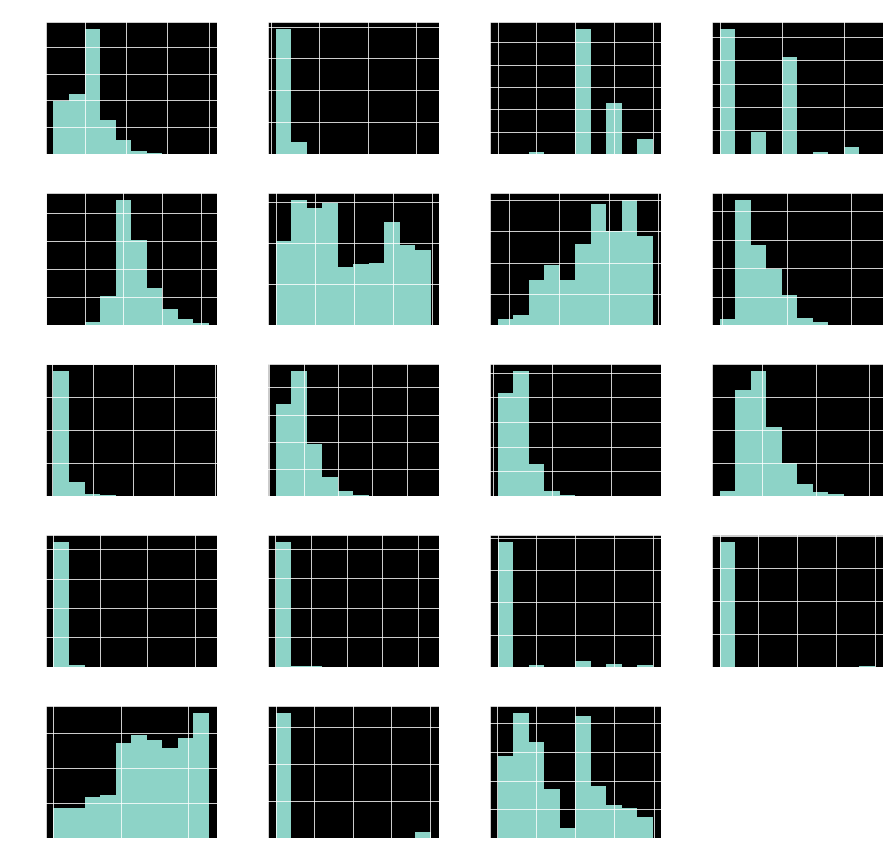

In [5]:
# A look at data distributions
df.hist(figsize=(15,15));

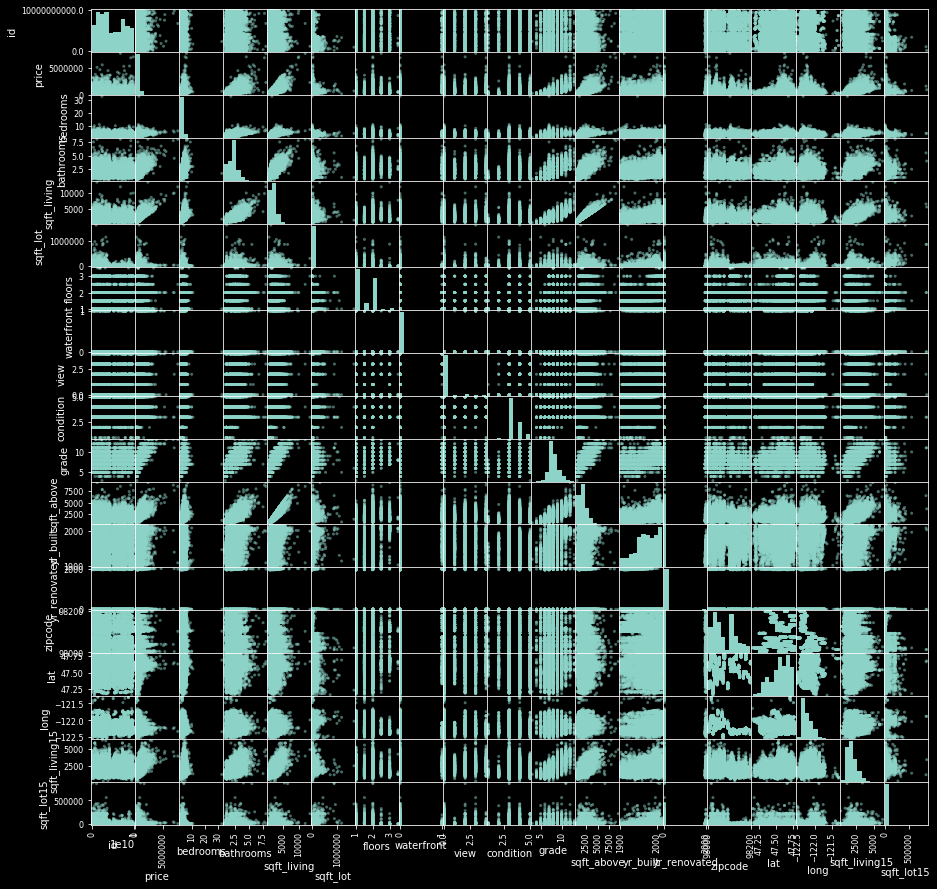

In [35]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

## Notes from Scatter Matrix:
### On correlations:
 - Clear positive correlation btw sqft_above, bathrooms, grade, and sqft_living
 - The same thing can be seen with price: bathrooms and sqft_living seem more important than the number of bedrooms
 - Price appears to be correlated with sqft_living, sqft_living15, sqft_above, grade, bathrooms, and with lat

### On distributions:
 - Few of the features are normally distributed from the start, some transformation may be helpful.
 - Price looks like it will certainly need a log/sqrt transform to normalize
 - Right away I can see that the grade is close to normally distributed already. This may be a result of how the scoring was done by King County.
 - Distributions which have positive skew and look like they may benefit from log transformation include:
     - bathrooms
     - floors
     - sqft_living
     - sqft_above
     - zipcode?
     - long
     - sqft_living15
 - lat also has a normalish distribution with negative skew

# Data Cleaning:

## Fixing sqft_basement:
 - This column has an object datatype, caused by '?' notation for its NaN values. These missing values can be calculated by subtracting the sqft_above column from the sqft_living column, and may still prove to be a valuable predictor.

In [6]:
# Checking to see if sqft_basement is always a clear difference between
# sqft_living and sqft_above
df[['sqft_living','sqft_above','sqft_basement']].head(10)

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0
3,1960,1050,910.0
4,1680,1680,0.0
5,5420,3890,1530.0
6,1715,1715,?
7,1060,1060,0.0
8,1780,1050,730.0
9,1890,1890,0.0


In [7]:
# Looking here to see if missing values might be saved with this logic
df[df['sqft_basement']=='?'][['sqft_living','sqft_above','sqft_basement']].head()

,sqft_living,sqft_above,sqft_basement
6,1715,1715,?
18,1200,1200,?
42,3595,3595,?
79,3450,3450,?
112,1540,1160,?


We can see from the cell above that there are rows with '?' for which the data can be restored by taking the difference between 'sqft_living' and 'sqft_above'

In [8]:
#Check number of ?'s
df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [9]:
#create new column by subtracting
df['sqft_basement2'] = df.sqft_living - df.sqft_above
df.sqft_basement2.head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement2, dtype: int64

In [10]:
#replace ?'s with numbers so the column can be converted to numeric for comparison
df.loc[df['sqft_basement']=='?',['sqft_basement']] = '99999'
df.sqft_basement = df.sqft_basement.astype('float64')
df.sqft_basement2 = df.sqft_basement2.astype('float64')

### I will check to see if there are any discrepancies in calculated sqft_basement values with the given ones, if there are none I will drop the old column for the new one.
There number of discrepancies between the newly calculated column and the old column should be equal to the number of '?'s in the original column to indicate that all calculated values agree with data that was given.

In [11]:
# Creating a boolean column to represent whether the values are the same to highlight differences
df['error_check'] = np.where(df['sqft_basement']==df['sqft_basement2'], True, False)
df.error_check.head()

0    True
1    True
2    True
3    True
4    True
Name: error_check, dtype: bool

In [12]:
print('Discrepancies between new column and orignial:',len(df) - df.error_check.sum())
print('Original number of missing values in sqft_basement:',len(df[df['sqft_basement']==99999]))

Discrepancies between new column and orignial: 454
Original number of missing values in sqft_basement: 454


### We see that there are the same number of discrepancies with the new basement sqare footage values as there were missing values in the original dataset.
 - this means that there were no discrepancies with known values. This means the old column can be replaced entirely with the newly calculated column.

In [13]:
# Dropping old column and the error_check column
df.drop(columns=['sqft_basement','error_check'], inplace=True)

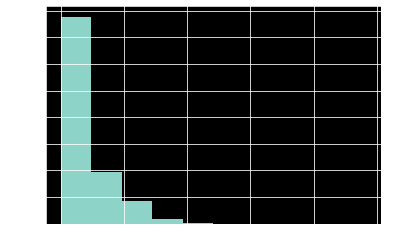

In [14]:
df.sqft_basement2.hist()

## Fixing NaN values:
Before I do any conversion to categorical variables I am going to fill null values and take a look at some simple regressions based on a heat map

### Waterfront:
 - I think the best way to deal with the missing values in this column is to replace them with zeroes. I had tried a different way of treating the missing values as a seperate category, but it did not improve model results. It is likely that a house on the waterfront would have that included in it's data.

In [15]:
# Filling NaN values with zeroes in waterfront:
df.waterfront.fillna(value=0,inplace=True)

### Now to deal with the 'yr_renovated' feature

In [16]:
# Check the total number of null values
df.yr_renovated.isnull().sum()

3842

### That's a lot of missing values
- I am going to work with the assumption that houses with no data for renovation are probably not renovated, and replace all of these values with zeroes.

In [17]:
# Filling the NaN values in 'yr_renovated' with zeros:
df.yr_renovated.fillna(value=0,inplace=True)
df.yr_renovated.isnull().sum()

0

###  View:
There are a small number of null values in this column. I think replacing them with the mode (zero) will be fine since the vast majority of entries are zero, and the reason the data is missing may be because the house was not viewed, which would be a zero.

In [18]:
df.view.fillna(value=0,inplace=True)

In [19]:
df.isnull().any()

id                False
date              False
price             False
bedrooms          False
bathrooms         False
sqft_living       False
sqft_lot          False
floors            False
waterfront        False
view              False
condition         False
grade             False
sqft_above        False
yr_built          False
yr_renovated      False
zipcode           False
lat               False
long              False
sqft_living15     False
sqft_lot15        False
sqft_basement2    False
dtype: bool

## We can use Pandas to look at Pearson correlation coefficients between our raw features, and Seaborn to produce a heatmap:

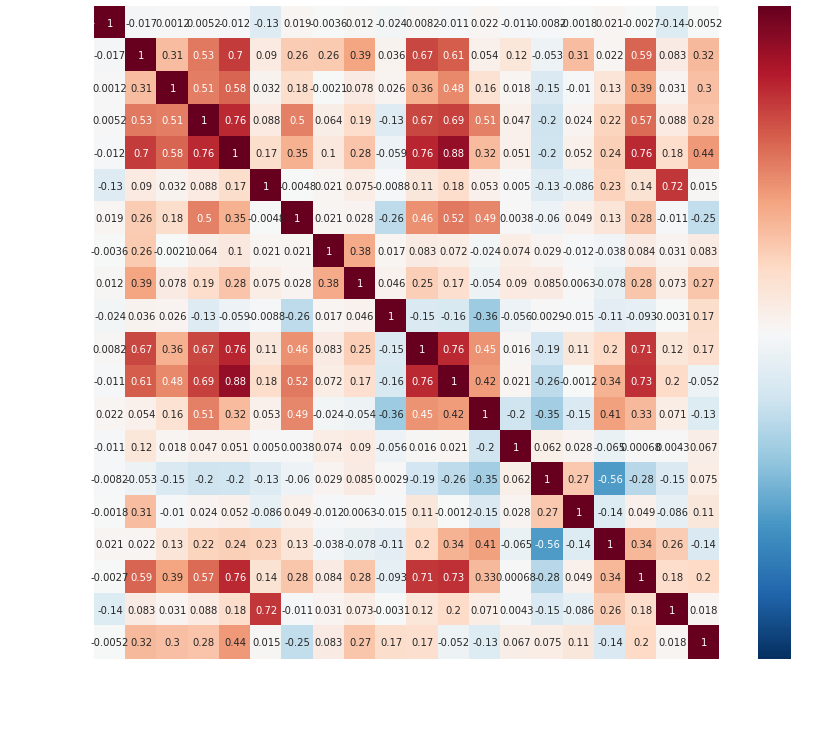

In [20]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

### I want to look at some regression models using this heatmap as a guide.
 - Price is most strongly correlated with 'sqft_living', which is also correlated with several other variables. It may be necessary to watch for the effects of collinearity if combining features. 
 - According to Robert M. O'brien in his paper "A Caution Regarding Rules of Thumb for Variance Inflation Factors," many textbooks and papers will say that a Variance Inflation Factor (VIF) of 10 or above (which corresponds to a r >= 0.95) indicates too much collinearity between variables, but he argues that this rule of thumb should not be used on its own to call for the elimination of independent variables. https://link.springer.com/article/10.1007%2Fs11135-006-9018-6
 - None of the r scores above are above this value anyways, but after reading several threads on stack exchange/overflow, it seems the consenus is that best practice should involve performing multiple regressions to see how the coefficients, and metrics are affected by the addition or removal of the variables.

Coefficients: [281.92891768]
Mean squared error: 70934204379.98718
Variance score: 0.4715275996633995


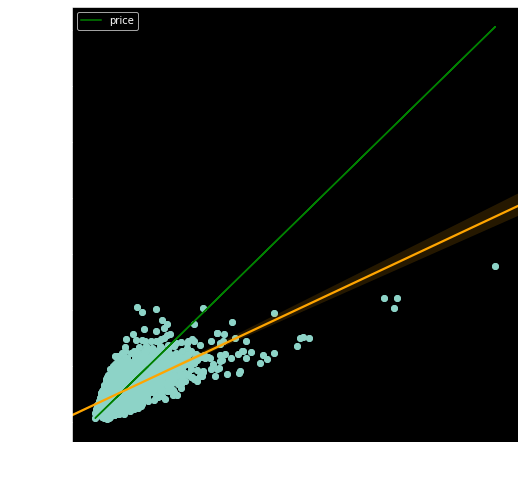

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:17:56   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Setting up X and y
X = pd.DataFrame(df['sqft_living'])
y = pd.DataFrame(df['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients:', linreg.coef_.flatten())
# mean squared error
print("Mean squared error:", mean_squared_error(y_test, predicted))
# R Squared
print('Variance score:', r2_score(y_test, predicted))

# Make a plot of recorded vs predicted
fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

We can see that alone, sqft_living does not provide a very accurate model, with this feature alone accounting for only 50% of the variance in house prices. I will try and add a second variable which is shown to be correlated with sqft_living, and see how the coefficient from the previous model changes, as well as the overall variance score and MSE.

Coefficients: 
 [294.28426042 -15.62790543]
Mean squared error: 70832859726.75
Variance score: 0.47


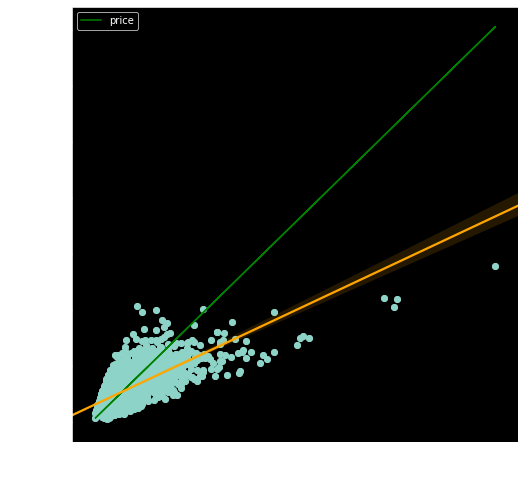

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:18:35   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.127e+04   4455.441     -9.262      0.000      -5e+04   -3.25e+04
sqft_living   295.7265      4.026     73.448      0.000     287.835     303.618
sqft_above    -18.8097      4.466     -4.212      0.000     -27.563     -10.056
==============================================================================
Omnibus:                    14762.837   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539868.557
Skew:                           2.809   Prob(JB):                         0.00
Kurtosis:                      26.841   Cond. No.                     7.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Setting up X and y
X = pd.DataFrame(df[['sqft_living','sqft_above']])
y = pd.DataFrame(df['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

We can see that the model fit has not improved at all after adding sqft_above. The coefficient of sqft_living has not changed dramatically, but the coefficient for sqft_above is very small, and surprisingly negative. I feel this is the result of the strong collinearity between the two independent variables in the model, causing the impact of sqft_above to be distorted by the presence of sqft_living. I will now run the model with ONLY sqft_above, to see what the coefficient would look like without the sqft_living variable present.

Coefficients: 
 [270.79633112]
Mean squared error: 88292888979.97
Variance score: 0.34


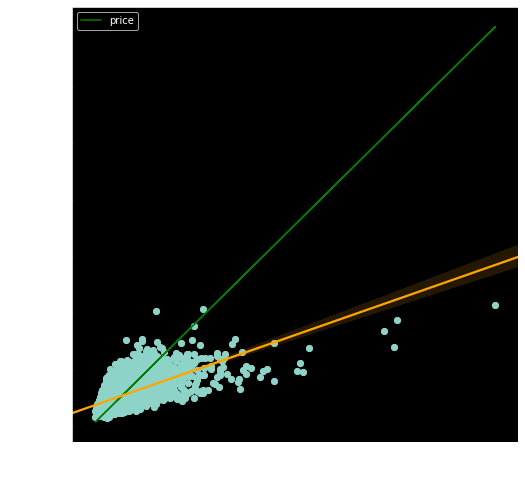

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:18:51   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Setting up X and y
X = pd.DataFrame(df[['sqft_above']])
y = pd.DataFrame(df['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

My suspicion has been confirmed After removing the sqft_living variable from this regression, we see now that the coefficient for sqft_above has jumped up to a similar value as that for sqft_living in the very first single feature model. This proves that in the previous model, the effect of sqft_above on price was completely masked by the presence of a highly collinear varialbe sqft_living, and the coefficient for it was misleading as a result. I will now try sqft_living along with another second variable, lat, which is not nearly as correlated with sqft_living as it is with price, to see how this affects modelling.

Coefficients: 
 [2.76096627e+02 7.19528162e+05]
Mean squared error: 61040044894.77
Variance score: 0.55


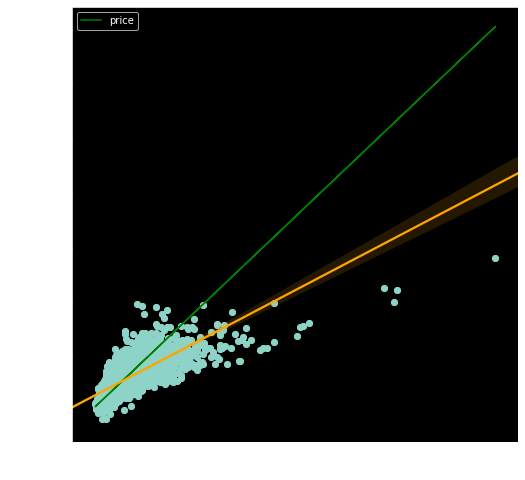

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                 1.407e+04
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:19:14   Log-Likelihood:            -2.9838e+05
No. Observations:               21597   AIC:                         5.968e+05
Df Residuals:                   21594   BIC:                         5.968e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.418e+07   5.66e+05    -60.391      0.000   -3.53e+07   -3.31e+07
sqft_living   275.2112      1.797    153.181      0.000     271.690     278.733
lat          7.181e+05   1.19e+04     60.315      0.000    6.95e+05    7.41e+05
==============================================================================
Omnibus:                    17186.154   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           954832.286
Skew:                           3.400   Prob(JB):                         0.00
Kurtosis:                      34.856   Cond. No.                     7.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Setting up X and y
X = pd.DataFrame(df[['sqft_living','lat']])
y = pd.DataFrame(df['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

Here we can see a much better result from adding a second variable. The fit of the model has improved, and the coefficient of the sqft_living variable has hardly moved. In looking for more variables to add, an issue becomes apparent: most variables that are correlated with price are more strongly correlated with each other than they actually are to price. This makes me think that adding them will distort the impacts of one another, but I'd like to see this in action anyways to make sure. I will add grade, because it is the next variable which has a correlation to price that is almost as high as its correlation to sqft_living, and see what the effect on the model is.

Coefficients: 
 [1.95124156e+02 6.67396587e+05 8.36452372e+04]
Mean squared error: 56395276681.01
Variance score: 0.58


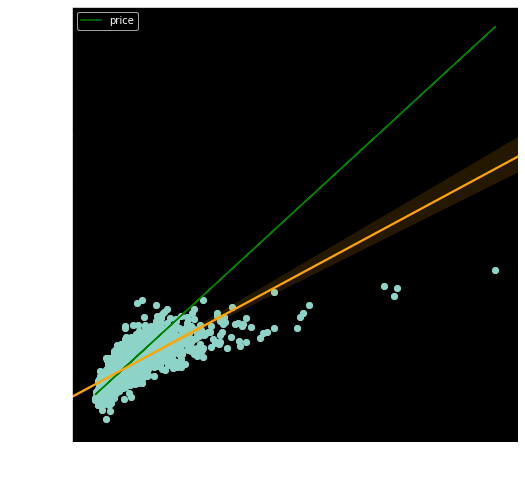

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                 1.064e+04
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:20:11   Log-Likelihood:            -2.9759e+05
No. Observations:               21597   AIC:                         5.952e+05
Df Residuals:                   21593   BIC:                         5.952e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.212e+07   5.48e+05    -58.610      0.000   -3.32e+07    -3.1e+07
sqft_living   192.3902      2.679     71.825      0.000     187.140     197.640
lat          6.646e+05   1.16e+04     57.525      0.000    6.42e+05    6.87e+05
grade         8.54e+04   2106.964     40.533      0.000    8.13e+04    8.95e+04
==============================================================================
Omnibus:                    19254.969   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1626681.260
Skew:                           3.936   Prob(JB):                         0.00
Kurtosis:                      44.782   Cond. No.                     7.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Setting up X and y
X = pd.DataFrame(df[['sqft_living','lat','grade']])
y = pd.DataFrame(df['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

We can see the model fit has improved only slightly, and the coefficient for sqft_living has indeed been distored by the addition. Lastly, I want to try yr_renovated.

Coefficients: 
 [2.74550936e+02 7.14338108e+05 7.78842135e+01]
Mean squared error: 60493320351.42
Variance score: 0.55


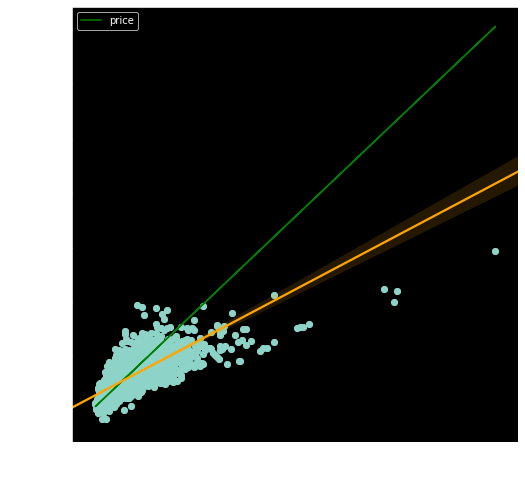

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     9600.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:20:20   Log-Likelihood:            -2.9824e+05
No. Observations:               21597   AIC:                         5.965e+05
Df Residuals:                   21593   BIC:                         5.965e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.394e+07   5.63e+05    -60.344      0.000    -3.5e+07   -3.28e+07
sqft_living    273.7105      1.787    153.157      0.000     270.208     277.213
lat            7.13e+05   1.18e+04     60.263      0.000     6.9e+05    7.36e+05
yr_renovated    76.0967      4.503     16.900      0.000      67.271      84.922
==============================================================================
Omnibus:                    17066.471   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           931050.310
Skew:                           3.368   Prob(JB):                         0.00
Kurtosis:                      34.453   Cond. No.                     7.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Setting up X and y
X = pd.DataFrame(df[['sqft_living','lat','yr_renovated']])
y = pd.DataFrame(df['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

This had a positive effect on MSE, and yr_renovated seems to have a meaningful coefficient. We will come back to modelling after creating some categorical variables for testing.

# Categorical Variables:

### Since sqft_basement2 is mostly an indicator of whether a house has a basement or not, I am going to turn it into a binary categorical variable.

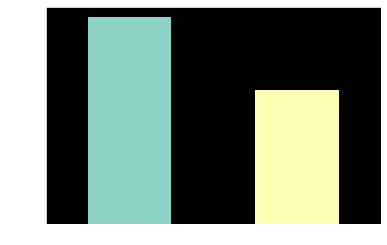

In [27]:
# Create bin edges and labels:
basement_bins = [-1,1,7000]
labels = ['0','1']

# Create the new column:
df['has_basement'] = pd.cut(df['sqft_basement2'], basement_bins, labels=labels)

# Change datatype to numeric so it works with math:
df.has_basement = df.has_basement.astype('int64')

# Bar graph of the new categorical variable:
df['has_basement'].value_counts().plot(kind='bar')

In [28]:
# Dropping old column:
df.drop(columns=['sqft_basement2'], inplace=True)

## Before I move forward in data cleaning, I want to see if there is a relationship between houses that sold more than once and the year they were renovated:

In [29]:
dups = df[df.id.duplicated(keep=False)]
dups.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,1939,0.0,98117,47.6870,-122.386,1570,4500,1
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,1939,0.0,98117,47.6870,-122.386,1570,4500,1
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1997,0.0,98006,47.5503,-122.102,3860,11244,1
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1997,0.0,98006,47.5503,-122.102,3860,11244,1
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,1922,1984.0,98146,47.4957,-122.352,1820,7460,1
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,1922,1984.0,98146,47.4957,-122.352,1820,7460,1
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,1943,0.0,98178,47.4897,-122.240,1020,7138,0
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,1943,0.0,98178,47.4897,-122.240,1020,7138,0
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1954,0.0,98133,47.7711,-122.341,1810,6929,1
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1954,0.0,98133,47.7711,-122.341,1810,6929,1


In [30]:
print('Total number of sales:',len(dups))
print('Number of houses on list:',dups.id.nunique())

Total number of sales: 353
Number of houses on list: 176


We can use value_counts to see that one house was sold 3 times:

In [31]:
dups.id.value_counts().head()

795000620     3
8651402750    2
5536100020    2
9238500040    2
1995200200    2
Name: id, dtype: int64

In [32]:
# Taking a look at the house that sold 3 times:
dups.loc[dups['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0


Looking at value counts in yr_renovated for our duplicate houses, we can see there are no recent renovations on any of the houses in the list, which is odd because some of them sold for a much higher price the second time around, which would seem unlikely if there wasn't some improvements done in between. However, this doesn't seem like obvious enough logic to actually modify the yr_renovated column to reflect large changes in price, though observing the effects on model accuracy resulting from this would be an interesting experiment. It seems to me like basing a variable of 'was_renovated' off of large price changes could artificially magnify it's own importance since we are predicting price movements based on the data that we have.

In [33]:
# Looking at the value counts for renovation years among repeat listings
dups.yr_renovated.value_counts().head(10).sort_index()

0.0       345
1964.0      2
1980.0      2
1984.0      2
1990.0      2
Name: yr_renovated, dtype: int64

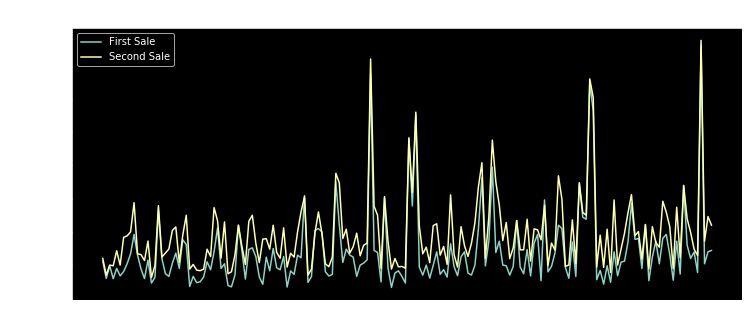

Average price increase on resell: 138.77 %


In [34]:
sns.set_style({'axes.grid':False})

prices = dups.groupby('id')['price']
plt.figure(figsize=(12,5))
sns.lineplot(range(len(prices)), prices.first(), label='First Sale')
sns.lineplot(range(len(prices)), prices.last(), label='Second Sale')
plt.title('Sale price difference for repeat sellers', fontdict={'fontsize':20})
plt.legend()
plt.show()

print('Average price increase on resell:', 
      round(prices.last().mean()/prices.first().mean() * 100, 2),'%')

That is quite an average increase on resold houses... there must have been something going on there. At the very least, this shows that people are successfully flipping houses in King County, whether what they are doing officially qualifies as renovation or not, there are clearly ways of profiting off of reselling houses.

## Now we need to deal with the date. Housing markets may fluctuate with the time of year, so this may prove to be a valuable predictor.

I am going to create a new variable 'month' and add it to the dataframe

In [35]:
# Create new column, split month off of string
df['month'] = df['date'].map(lambda x: x.split('/')[0])

# Cast the column as a numeric datatype
df['month'] = df['month'].astype('int64')

# Check to make sure it worked properly:
df[['date','month']].head()

,date,month
0,10/13/2014,10
1,12/9/2014,12
2,2/25/2015,2
3,12/9/2014,12
4,2/18/2015,2


Since the 'date' column is still an object datatype, I am going to turn it into a ordinal datetime in order to make a continuous variable out of it.

In [36]:
# Viewing the current format:
df.date.head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [37]:
import datetime as dt

df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

I am going to check to see what the time range over which the data was collected was:

In [38]:
print('Earliest date in dataframe:',df.date.min())
print('Lastest date in dataframe:',df.date.max())

Earliest date in dataframe: 2014-05-02 00:00:00
Lastest date in dataframe: 2015-05-27 00:00:00


In [39]:
# Make date into a continuous variable to compare with the month feature
df['date'] = df.date.map(dt.datetime.toordinal)
df.date.head()

0    735519
1    735576
2    735654
3    735576
4    735647
Name: date, dtype: int64

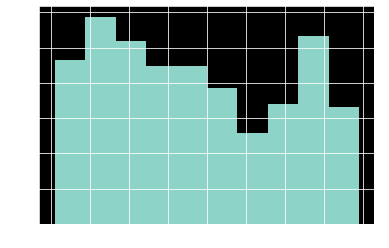

In [40]:
# A look at the new format
df.date.hist()

r-score between date and price: -0.0039981325336978435


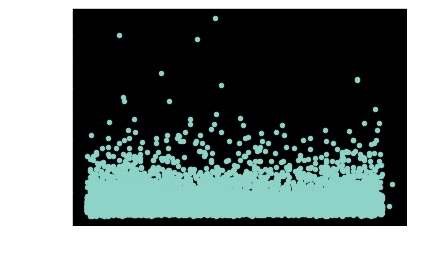

In [41]:
# A look at date vs price:
print('r-score between date and price:',df.date.corr(df.price))
df.plot.scatter(x='date', y='price')

There does not seem to be any correlation between date and price.

## Now a look at yr_renovated:

I want to see if there is a correlation between price and yr_renovated when the zeroes are taken out of consideration

r score: 0.12549911691343757


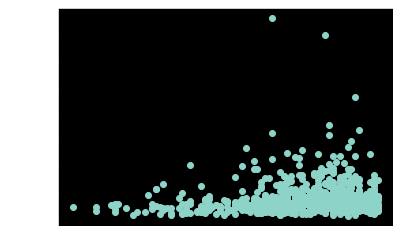

In [42]:
print('r score:',df[df['yr_renovated']>0].yr_renovated.corr(df.price))
plt.scatter(df[df['yr_renovated']>0].yr_renovated, df[df['yr_renovated']>0].price)

There does appear to be some correlation between more recent renovations and higher prices. I want to see how adding the zeros back in affects this.

r score: 0.11785522779076017


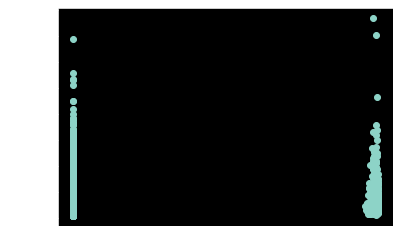

In [43]:
print('r score:',df.yr_renovated.corr(df.price))
plt.scatter(df.yr_renovated, df.price)

The feature remains correlated to price even with the vast sum of zeros added back in. For comparison, I am also going to create a categorical variable that shows whether a house has been renovated or not.

In [44]:
# Set up bins and labels and cut into binary variable
bins = [-1, 1, df.yr_renovated.max()]
labels = ['0','1']
df['was_renovated'] = pd.cut(df.yr_renovated, bins, labels=labels)

# Changing datatype to numeric
df.was_renovated = df.was_renovated.astype('int64')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,month,was_renovated
0,7129300520,735519,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10,0
1,6414100192,735576,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12,1
2,5631500400,735654,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0,2,0
3,2487200875,735576,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,1,12,0
4,1954400510,735647,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2,0


I'd like to compare to see whether the continuous version of the variable has more or less correlation to price than the categorical version:

In [45]:
print('r score of continous:',df.yr_renovated.corr(df.price))
print('r score of categorical:',df.was_renovated.corr(df.price))

r score of continous: 0.11785522779076017
r score of categorical: 0.11754308700194353


We can see that the variable has very similar correlation to price in either form, I believe this is due to the fact that the values in yr_renovated that are not zero are so clustered together that they basically act like a 1 versus the large body of zeroes. I am going to try a sqrt transform to see if it gets more strongly correlated.

In [46]:
df['yr_renovated_sqrt'] = np.sqrt(df.yr_renovated)
print('r score of transformed feature', df.yr_renovated_sqrt.corr(df.price))

r score of transformed feature 0.11770073127526566


This actually reduced the r score, so I am going to drop that column. I am also going to drop the original yr_renovated feature, since the categorical version should be sufficient.

In [47]:
df.drop(columns=['yr_renovated_sqrt', 'yr_renovated'], inplace=True)

Let's take a look at our new dataframe to see that all data types are numeric:

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
has_basement     21597 non-null int64
month            21597 non-null int64
was_renovated    21597 non-null int64
dtypes: float64(7), int64(15)
memory usag

# Another look at modelling:
Since we have cleaned the data more and gotten some categorical features established, I would like to look at another heat map and see how some new models will compare to the others from the last section.

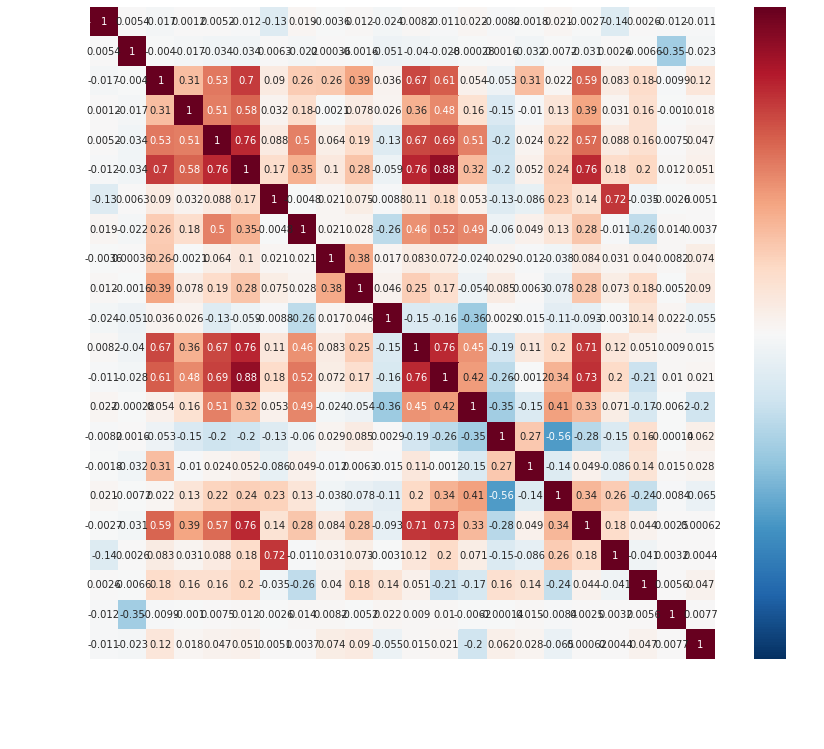

In [49]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

I will start this section with the combination of sqft_living and lat that worked well earlier, then add one at a time to see the impacts. For comparison convenience, I will run the model once with only the two.

Coefficients: 
 [2.76096627e+02 7.19528162e+05]
Mean squared error: 61040044894.77
Variance score: 0.55


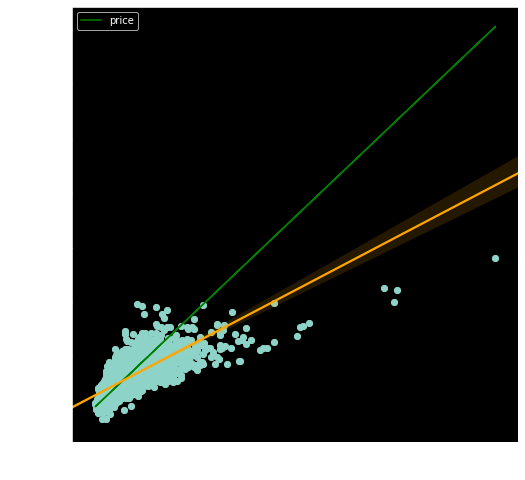

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                 1.407e+04
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:23:09   Log-Likelihood:            -2.9838e+05
No. Observations:               21597   AIC:                         5.968e+05
Df Residuals:                   21594   BIC:                         5.968e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.418e+07   5.66e+05    -60.391      0.000   -3.53e+07   -3.31e+07
sqft_living   275.2112      1.797    153.181      0.000     271.690     278.733
lat          7.181e+05   1.19e+04     60.315      0.000    6.95e+05    7.41e+05
==============================================================================
Omnibus:                    17186.154   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           954832.286
Skew:                           3.400   Prob(JB):                         0.00
Kurtosis:                      34.856   Cond. No.                     7.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Setting up X and y
X = pd.DataFrame(df[['sqft_living','lat']])
y = pd.DataFrame(df['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

First I will add waterfront, since it is not terribly collinear with the others, and I have a feeling it will be an important predictor.

Coefficients: 
 [2.68535363e+02 7.27693705e+05 8.33419544e+05]
Mean squared error: 54005784274.41
Variance score: 0.60


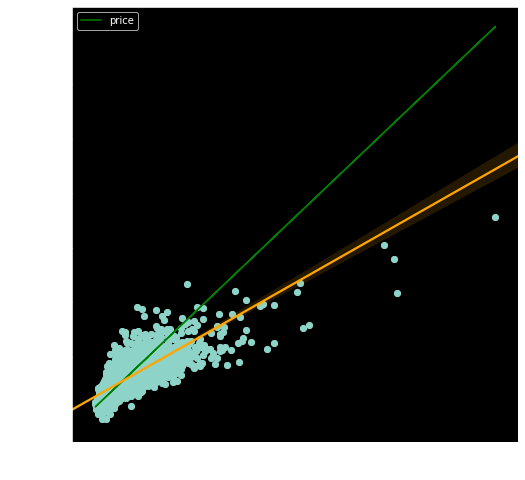

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 1.100e+04
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:23:15   Log-Likelihood:            -2.9737e+05
No. Observations:               21597   AIC:                         5.948e+05
Df Residuals:                   21593   BIC:                         5.948e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.461e+07    5.4e+05    -64.062      0.000   -3.57e+07   -3.36e+07
sqft_living   266.8541      1.724    154.758      0.000     263.474     270.234
lat          7.273e+05   1.14e+04     64.002      0.000    7.05e+05     7.5e+05
waterfront    8.87e+05   1.93e+04     45.973      0.000    8.49e+05    9.25e+05
==============================================================================
Omnibus:                    15904.806   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812877.806
Skew:                           3.030   Prob(JB):                         0.00
Kurtosis:                      32.438   Cond. No.                     7.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# Setting up X and y
X = pd.DataFrame(df[['sqft_living','lat','waterfront']])
y = pd.DataFrame(df['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

Adding waterfront had a positive impact on model fit, and minimal impact on the coefficients from the previous model. It should be noted that the standard error on both lat and waterfront is quite high, so the coefficients are not as reliable as the one for sqft_living, which is has a very low standard error. I will add was_renovated next.

Coefficients: 
 [2.67428770e+02 7.23124870e+05 8.12759229e+05 1.30856262e+05]
Mean squared error: 53735808024.85
Variance score: 0.60


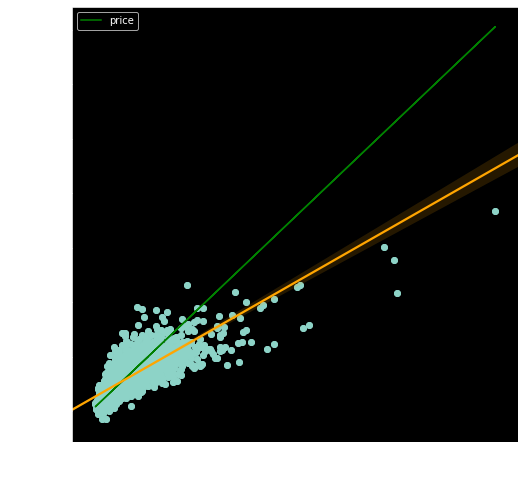

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     8384.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:23:44   Log-Likelihood:            -2.9727e+05
No. Observations:               21597   AIC:                         5.945e+05
Df Residuals:                   21592   BIC:                         5.946e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.441e+07   5.38e+05    -63.966      0.000   -3.55e+07   -3.34e+07
sqft_living     265.8132      1.718    154.758      0.000     262.447     269.180
lat             7.23e+05   1.13e+04     63.902      0.000    7.01e+05    7.45e+05
waterfront     8.676e+05   1.92e+04     45.070      0.000     8.3e+05    9.05e+05
was_renovated  1.245e+05   8613.791     14.450      0.000    1.08e+05    1.41e+05
==============================================================================
Omnibus:                    15797.919   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           797199.847
Skew:                           3.002   Prob(JB):                         0.00
Kurtosis:                      32.152   Cond. No.                     7.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Setting up X and y
X = pd.DataFrame(df[['sqft_living','lat','waterfront','was_renovated']])
y = pd.DataFrame(df['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

This made for a very slight improvement in MSE, but it did not seem to move the other coefficients much, and it appears to have a meaningful coefficient with a comparably low standard error, indicating the the presence of renovations would add 100,000 dollars to the value of a house, so I will leave it in. Next I will add has_basement.

Coefficients: 
 [ 2.67961422e+02  7.25499413e+05  8.13395039e+05  1.31274914e+05
 -5.19610174e+03]
Mean squared error: 53747859500.78
Variance score: 0.60


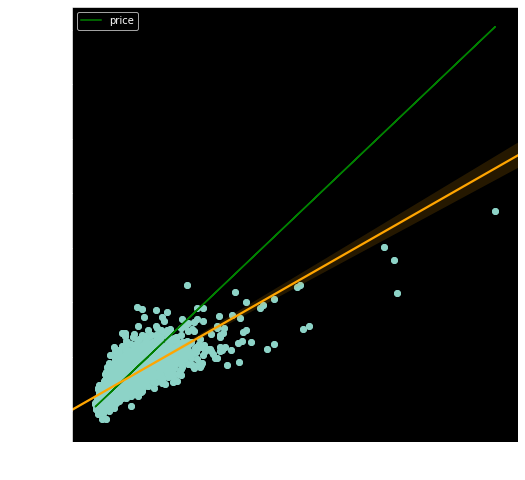

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     6707.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:24:01   Log-Likelihood:            -2.9727e+05
No. Observations:               21597   AIC:                         5.945e+05
Df Residuals:                   21591   BIC:                         5.946e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.448e+07   5.42e+05    -63.555      0.000   -3.55e+07   -3.34e+07
sqft_living     266.1445      1.751    151.983      0.000     262.712     269.577
lat            7.244e+05   1.14e+04     63.484      0.000    7.02e+05    7.47e+05
waterfront     8.679e+05   1.93e+04     45.081      0.000     8.3e+05    9.06e+05
was_renovated  1.247e+05   8618.382     14.474      0.000    1.08e+05    1.42e+05
has_basement  -3209.5106   3303.345     -0.972      0.331   -9684.311    3265.290
==============================================================================
Omnibus:                    15795.370   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           796015.683
Skew:                           3.002   Prob(JB):                         0.00
Kurtosis:                      32.130   Cond. No.                     7.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Setting up X and y
X = pd.DataFrame(df[['sqft_living','lat','waterfront','was_renovated','has_basement']])
y = pd.DataFrame(df['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

This had a very slightly negative effect on model accuracy, and the coefficient for has_basment is surprisingly negative. I will drop it because it didn't improve the model. View looks like a good candidate because it has some correlation to price without collinearity with sqft_living. I will run the model with this addition.

Coefficients: 
 [2.51874225e+02 7.25181921e+05 5.59386040e+05 1.15861875e+05
 7.57264077e+04]
Mean squared error: 51040431745.26
Variance score: 0.62


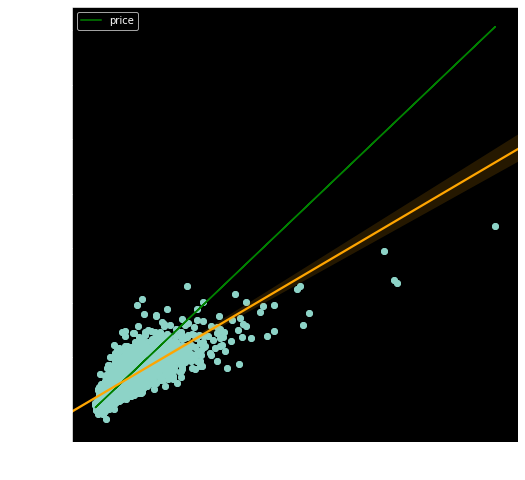

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     7294.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:24:09   Log-Likelihood:            -2.9671e+05
No. Observations:               21597   AIC:                         5.934e+05
Df Residuals:                   21591   BIC:                         5.935e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.446e+07   5.24e+05    -65.748      0.000   -3.55e+07   -3.34e+07
sqft_living     250.4764      1.734    144.482      0.000     247.078     253.874
lat            7.245e+05    1.1e+04     65.714      0.000    7.03e+05    7.46e+05
waterfront     6.187e+05   2.01e+04     30.718      0.000    5.79e+05    6.58e+05
was_renovated  1.079e+05   8407.478     12.829      0.000    9.14e+04    1.24e+05
view           7.594e+04   2238.467     33.924      0.000    7.15e+04    8.03e+04
==============================================================================
Omnibus:                    16109.001   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           929702.904
Skew:                           3.049   Prob(JB):                         0.00
Kurtosis:                      34.559   Cond. No.                     7.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Setting up X and y
X = pd.DataFrame(df[['sqft_living','lat','waterfront','was_renovated','view']])
y = pd.DataFrame(df['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

This gave a noticeable improvement in model accuracy, with a higher r2 and lower MSE. It did, however, distort the coefficient for waterfront somewhat. This is because view and waterfront are collinear, which I've just noticed. However, since the standard error for view is lower than that for waterfront, and the coefficient large, I will leave it in the model.

## Dealing with Outliers in the data:
I want to remove the most extreme data points and determine the effect this has on model performance.

In [55]:
sns.set_style({'axes.grid':True})

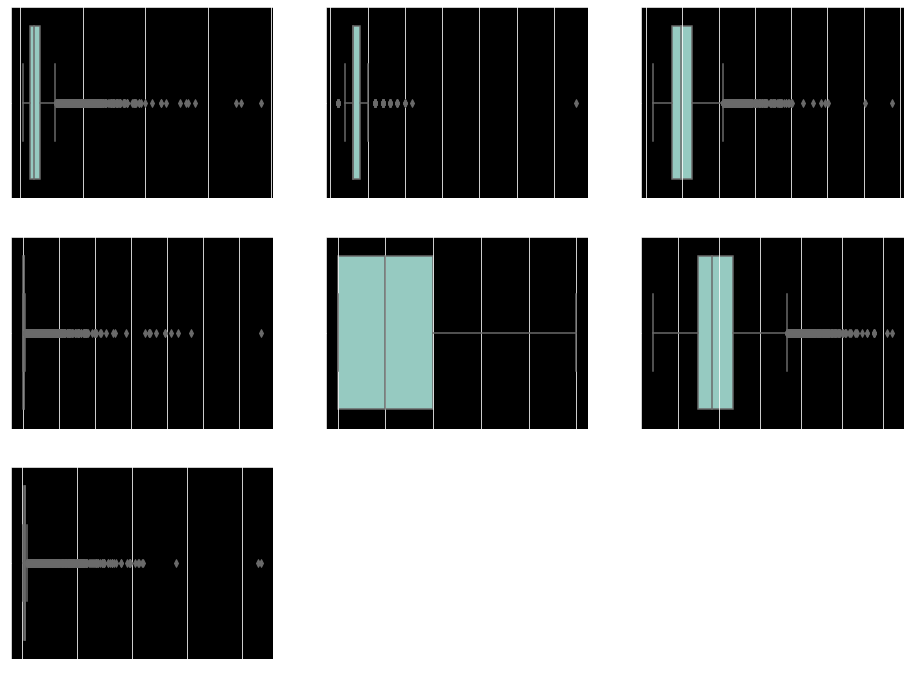

In [56]:
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price)
plt.subplot(332)
sns.boxplot(df.bedrooms)
plt.subplot(333)
sns.boxplot(df.sqft_living)
plt.subplot(334)
sns.boxplot(df.sqft_lot)
plt.subplot(335)
sns.boxplot(df.floors)
plt.subplot(336)
sns.boxplot(df.sqft_living15)
plt.subplot(337)
sns.boxplot(df.sqft_lot15)

In [57]:
print('Size of original dataset:',len(df))
df2 = df.copy()
df2 = df2[df2.price < 4000000]
df2 = df2[df2.bedrooms < 10]
df2 = df2[df2.sqft_living < 8000]
df2 = df2[df2.sqft_lot < 500000]
print('Size of trimmed dataset:',len(df2))

Size of original dataset: 21597
Size of trimmed dataset: 21556


In [58]:
sns.set_style({'axes.grid':False})

Now a regression to see how removing these outliers affected model fit:

Coefficients: 
 [2.36909777e+02 7.20096622e+05 5.35587172e+05 1.08810986e+05
 8.09200527e+04]
Mean squared error: 46878404512.52
Variance score: 0.62


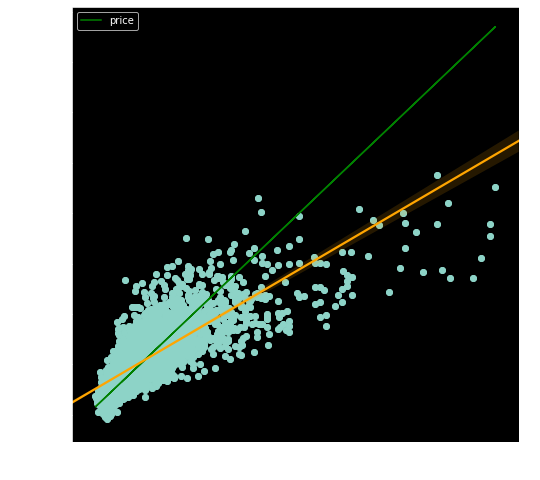

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     7203.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:24:31   Log-Likelihood:            -2.9497e+05
No. Observations:               21556   AIC:                         5.900e+05
Df Residuals:                   21550   BIC:                         5.900e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.443e+07   4.97e+05    -69.286      0.000   -3.54e+07   -3.35e+07
sqft_living     238.1955      1.675    142.172      0.000     234.912     241.479
lat            7.243e+05   1.05e+04     69.298      0.000    7.04e+05    7.45e+05
waterfront     5.445e+05   1.95e+04     27.970      0.000    5.06e+05    5.83e+05
was_renovated  1.014e+05   7980.946     12.704      0.000    8.57e+04    1.17e+05
view           7.845e+04   2129.944     36.833      0.000    7.43e+04    8.26e+04
==============================================================================
Omnibus:                    11516.918   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188266.363
Skew:                           2.202   Prob(JB):                         0.00
Kurtosis:                      16.792   Cond. No.                     7.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# Setting up X and y
X = pd.DataFrame(df2[['sqft_living','lat','waterfront','was_renovated','view']])
y = pd.DataFrame(df2['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

We can see this caused a very slight decrease in R squared, but a noticeably lower mean squared error and JB score.

## How does location affect price?

In [60]:
print('Min lat:',df2.lat.min())
print('Max lat:',df2.lat.max())
print('Min long:',df2.long.min())
print('Max long:',df2.long.max())

Min lat: 47.1559
Max lat: 47.7776
Min long: -122.51899999999999
Max long: -121.315


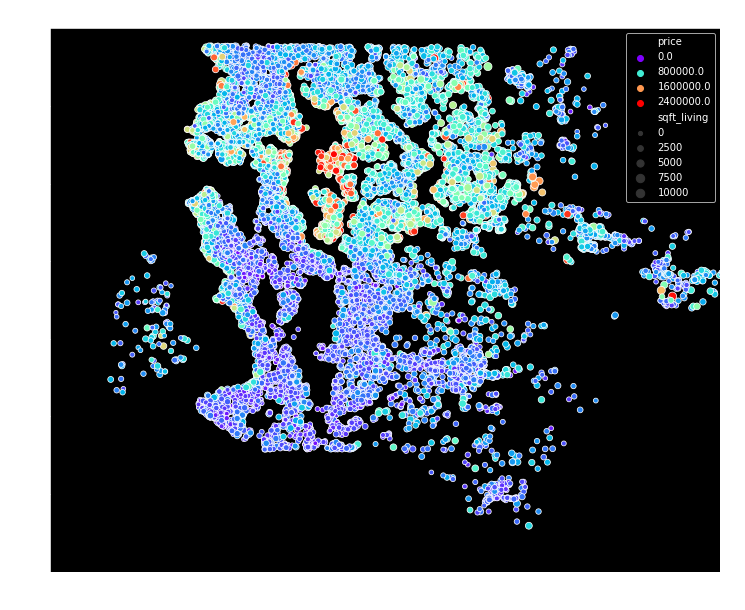

In [61]:
# Restricting the mapped houses to those under $ 2 mil to allow the color spectrum to work
map_df = df2[df2['price'] < 2000000]
plt.figure(figsize=(12,10))
sns.scatterplot(map_df.long, map_df.lat, hue=map_df.price, size=map_df.sqft_living, palette='rainbow')
plt.xlim(-122.6,-121.7)
plt.ylim(47.1,47.8)
plt.title('Locations vs Price', fontdict={'fontsize':20})
plt.show()

# Transforming the target variable:

In [62]:
from scipy.stats import norm
import scipy.stats as stats

First a look at the distribution and probability plot of target variable:

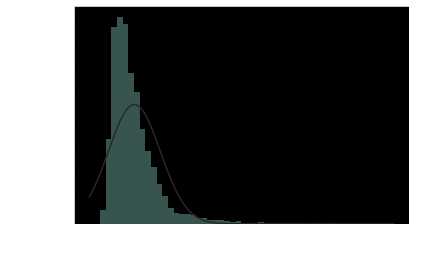

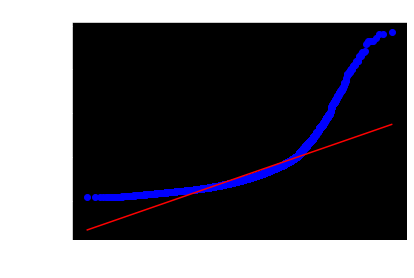

In [63]:
target = df2.price

# Create histogram with seaborn:
sns.distplot(target, fit=norm, bins=50, kde=False);

# Look at probability plot with scipy.stats:
fig = plt.figure()
res = stats.probplot(target, plot=plt)

We can see that the target is very positively skewed. We can see the exact skew value using .skew():

In [64]:
target.skew()

2.960903436443815

A skew score of 1 represents a strong positive skew, so this variable is extremely positively skewed. Let's see how a log transformation affects it:

In [65]:
target2 = np.log(target)

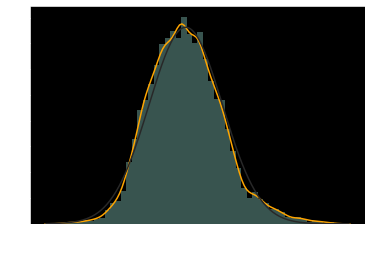

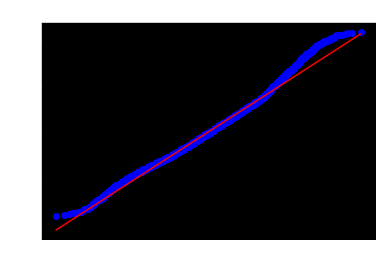

In [66]:
sns.distplot(target2, fit=norm, bins=50, kde_kws={'color':'orange'});
fig = plt.figure()
res = stats.probplot(target2, plot=plt)

In [67]:
target2.skew()

0.3870014685898396

We can see that the target variable skew has benefitted dramatically from the log transformation. We can see on the Probability plot that the tails look good as well, though they may be a little fat. We can check what the kurtosis value is as such:

In [68]:
target2.kurtosis()

0.5072481498206693

I will run the same regression as before, this time with the newly transformed target:

Coefficients: 
 [3.62000360e-04 1.57189024e+00 3.51488016e-01 1.39094482e-01
 9.93866757e-02]
Mean squared error: 0.09
Variance score: 0.69


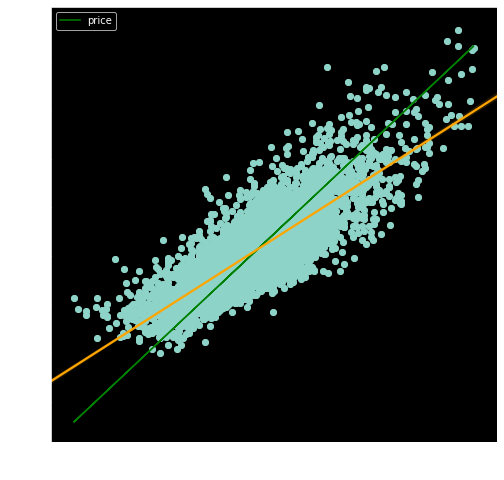

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     9284.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:25:05   Log-Likelihood:                -4231.3
No. Observations:               21556   AIC:                             8475.
Df Residuals:                   21550   BIC:                             8522.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -62.9036      0.690    -91.210      0.000     -64.255     -61.552
sqft_living       0.0004   2.33e-06    156.286      0.000       0.000       0.000
lat               1.5804      0.015    108.955      0.000       1.552       1.609
waterfront        0.3546      0.027     13.127      0.000       0.302       0.408
was_renovated     0.1375      0.011     12.415      0.000       0.116       0.159
view              0.0976      0.003     33.008      0.000       0.092       0.103
==============================================================================
Omnibus:                      268.544   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.036
Skew:                           0.009   Prob(JB):                    1.74e-106
Kurtosis:                       3.736   Cond. No.                     7.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
# Setting up X and y
X = pd.DataFrame(df2[['sqft_living','lat','waterfront','was_renovated','view']])
y = target2

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

We can see that this transformation had a noticeable positive effect on r squared and JB score. However, the process has made the coefficients slightly less simple to evaluate in their actual dollar values. Soon I will standardize the independent variables so that I can analyze the scale of their impacts.

# Making 'zipcode' Categorical:
The zipcode value, in the earlier heatmaps, presented no correlation to price. It occurs to me that this is because it is being treated as a continuous variable, and the numbering system used may not be working to show a relationship with price. Logically, since there is a set number of zipcodes in any county, I think it would be more valuable to treat each zipcode as its own category, which would reflect very specific location, and likely have a positive impact on model accuracy.

In [70]:
# Code for turning a list of variables into categorical. I am only using zipcode
for_encoding = ['zipcode']

for col in for_encoding:
    df2[col] = df2[col].astype('category')
    dummy = pd.get_dummies(df2[col], prefix=col, drop_first=True)
    df2 = pd.concat([df2, dummy], axis=1)
    df2.drop(columns=[col], inplace=True)

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21556 entries, 0 to 21596
Data columns (total 90 columns):
id               21556 non-null int64
date             21556 non-null int64
price            21556 non-null float64
bedrooms         21556 non-null int64
bathrooms        21556 non-null float64
sqft_living      21556 non-null int64
sqft_lot         21556 non-null int64
floors           21556 non-null float64
waterfront       21556 non-null float64
view             21556 non-null float64
condition        21556 non-null int64
grade            21556 non-null int64
sqft_above       21556 non-null int64
yr_built         21556 non-null int64
lat              21556 non-null float64
long             21556 non-null float64
sqft_living15    21556 non-null int64
sqft_lot15       21556 non-null int64
has_basement     21556 non-null int64
month            21556 non-null int64
was_renovated    21556 non-null int64
zipcode_98002    21556 non-null uint8
zipcode_98003    21556 non-null uint8
zip

I would like to run the same model as before to see how this addition will affect the model. I will use the untransformed target variable so that I can see the actual dollar impact that the variables have.

Coefficients: 
 [ 2.12754305e+02  1.90537542e+05  6.18770077e+05  4.51610503e+04
  7.00047645e+04  1.17745077e+04 -4.47387316e+03  7.63383687e+05
  3.00481136e+05  2.66134028e+05  2.17406069e+05  2.01039008e+05
  9.25522746e+04  5.30549043e+04  3.58978760e+04  7.97457314e+03
  2.87198124e+04 -2.56083396e+04  1.38123583e+05  1.56885939e+05
  3.51383078e+04  2.01382472e+05 -7.59706768e+03 -8.79196562e+02
 -1.78777201e+03  3.15860331e+05  1.32523143e+05  2.17470833e+04
  1.17502641e+06  5.04043025e+05  3.11714608e+03  8.22425807e+04
  1.90556705e+05  1.72193557e+05  9.75124005e+03  6.21864195e+04
  1.36958806e+04  7.87180198e+04  4.24840471e+04  2.49009462e+04
  1.07016614e+05  1.71532504e+05  1.85222449e+05  1.25708610e+05
 -1.50418265e+04  4.46769477e+05  2.73514737e+05  4.40548928e+05
  7.44457518e+04  2.78050449e+05  6.23261988e+04  4.81577221e+05
  6.10354102e+05  2.70051994e+05  2.49089472e+05  2.56130308e+05
  1.19558808e+05  4.49725894e+05  3.16458744e+05  1.18929414e+05
  1.48816

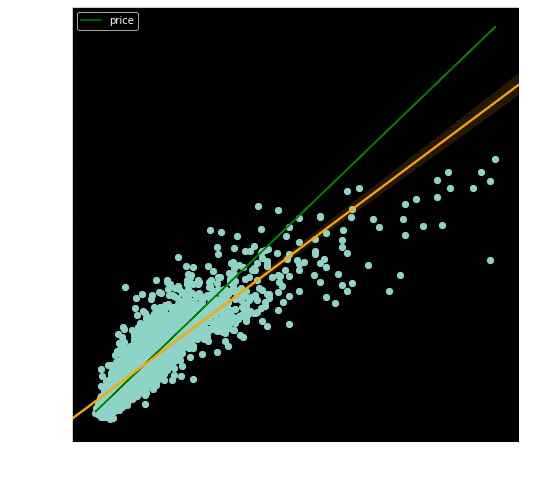

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     1093.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:25:49   Log-Likelihood:            -2.8873e+05
No. Observations:               21556   AIC:                         5.776e+05
Df Residuals:                   21481   BIC:                         5.782e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.043e+07   2.97e+06     -3.516      0.000   -1.62e+07   -4.61e+06
sqft_living     214.3906      1.405    152.563      0.000     211.636     217.145
lat            2.176e+05   6.27e+04      3.471      0.001    9.47e+04     3.4e+05
waterfront      6.19e+05   1.48e+04     41.801      0.000     5.9e+05    6.48e+05
was_renovated  3.611e+04   6040.288      5.978      0.000    2.43e+04    4.79e+04
view            6.78e+04   1665.378     40.710      0.000    6.45e+04    7.11e+04
zipcode_98002  1.754e+04   1.41e+04      1.248      0.212      -1e+04    4.51e+04
zipcode_98003 -1908.6649   1.27e+04     -0.151      0.880   -2.68e+04    2.29e+04
zipcode_98004   7.49e+05   2.29e+04     32.748      0.000    7.04e+05    7.94e+05
zipcode_98005  3.013e+05   2.41e+04     12.499      0.000    2.54e+05    3.49e+05
zipcode_98006  2.643e+05   1.92e+04     13.800      0.000    2.27e+05    3.02e+05
zipcode_98007  2.149e+05   2.46e+04      8.725      0.000    1.67e+05    2.63e+05
zipcode_98008  2.029e+05   2.29e+04      8.861      0.000    1.58e+05    2.48e+05
zipcode_98010   8.35e+04   1.81e+04      4.624      0.000    4.81e+04    1.19e+05
zipcode_98011  3.911e+04   3.13e+04      1.248      0.212   -2.23e+04    1.01e+05
zipcode_98014  3.877e+04   2.83e+04      1.372      0.170   -1.66e+04    9.42e+04
zipcode_98019 -2310.4682   3.04e+04     -0.076      0.939   -6.19e+04    5.72e+04
zipcode_98022  2.913e+04   1.48e+04      1.968      0.049     124.325    5.81e+04
zipcode_98023 -1.809e+04    1.1e+04     -1.645      0.100   -3.96e+04    3465.151
zipcode_98024  1.341e+05   2.52e+04      5.314      0.000    8.46e+04    1.84e+05
zipcode_98027   1.52e+05   1.76e+04      8.629      0.000    1.17e+05    1.87e+05
zipcode_98028   3.05e+04   3.07e+04      0.994      0.320   -2.96e+04    9.06e+04
zipcode_98029  1.967e+05   1.99e+04      9.887      0.000    1.58e+05    2.36e+05
zipcode_98030 -5577.0273   1.35e+04     -0.412      0.680   -3.21e+04     2.1e+04
zipcode_98031  -848.0524   1.41e+04     -0.060      0.952   -2.84e+04    2.67e+04
zipcode_98032 -7605.3503    1.7e+04     -0.447      0.655   -4.09e+04    2.57e+04
zipcode_98033  3.152e+05   2.59e+04     12.177      0.000    2.65e+05    3.66e+05
zipcode_98034  1.222e+05    2.8e+04      4.367      0.000    6.73e+04    1.77e+05
zipcode_98038  2.357e+04   1.13e+04      2.082      0.037    1378.494    4.58e+04
zipcode_98039   1.22e+06   3.18e+04     38.422      0.000    1.16e+06    1.28e+06
zipcode_98040  5.144e+05   2.03e+04     25.371      0.000    4.75e+05    5.54e+05
zipcode_98042  5196.7179   1.14e+04      0.457      0.647   -1.71e+04    2.75e+04
zipcode_98045  7.498e+04   1.71e+04      4.387      0.000    4.15e+04    1.08e+05
zipcode_98052  1.833e+05   2.56e+04      7.153      0.000    1.33e+05    2.34e+05
zipcode_98053  1.661e+05    2.6e+04      6.395   

In [72]:
# First to get all the zipcode feature names on a list:
zipcodes = []
features = ['sqft_living','lat','waterfront','was_renovated','view']
for col in df2.columns:
    if col.startswith('zipcode'):
        zipcodes.append(col)
        
# Adding zipcodes to features:
features.extend(zipcodes)

# Setting up X and y
X = pd.DataFrame(df2[features])
y = pd.DataFrame(df2['price'])

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

We can see this improved the model accuracy dramatically, with a much higher r squared and much lower mean squared error. There are, however, some p-values greater than .05 among the zipcode dummy variables. I will run this again with the transformed target:

Coefficients: 
 [ 3.20875436e-04  5.46510602e-01  4.68592505e-01  5.96144794e-02
  7.98174069e-02 -6.49047547e-02  1.10810349e-02  1.00720085e+00
  6.36824100e-01  5.62143531e-01  5.28072362e-01  4.79214010e-01
  3.02419764e-01  2.26458864e-01  1.24848668e-01  1.03091862e-01
  1.27078892e-01 -2.68450083e-02  3.15203498e-01  4.27617811e-01
  1.63650610e-01  5.16363207e-01  1.87732583e-02  3.09459124e-02
 -8.83662136e-02  6.04039824e-01  3.11115718e-01  1.50430316e-01
  1.18036482e+00  7.99594306e-01  3.87057751e-02  2.65493062e-01
  4.81698615e-01  4.25764906e-01  3.40411993e-02  2.05114557e-01
  9.79709370e-02  2.71130392e-01  2.70496676e-01  3.05989997e-01
  3.00902697e-01  4.58139277e-01  4.93219555e-01  3.30739249e-01
  6.88054443e-02  8.10964231e-01  5.87623336e-01  7.56820281e-01
  1.31776682e-01  6.15016543e-01  1.61143206e-01  8.28442408e-01
  8.90162691e-01  5.82487740e-01  5.84119107e-01  5.66022272e-01
  2.67716628e-01  8.08966265e-01  6.52889104e-01  2.97770976e-01
  3.51238

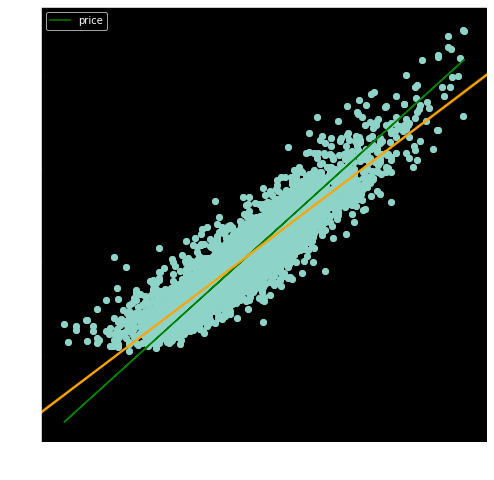

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1581.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:26:01   Log-Likelihood:                 3474.5
No. Observations:               21556   AIC:                            -6799.
Df Residuals:                   21481   BIC:                            -6201.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -15.9034      3.845     -4.136      0.000     -23.440      -8.367
sqft_living       0.0003   1.82e-06    177.251      0.000       0.000       0.000
lat               0.5871      0.081      7.224      0.000       0.428       0.746
waterfront        0.4493      0.019     23.401      0.000       0.412       0.487
was_renovated     0.0555      0.008      7.091      0.000       0.040       0.071
view              0.0788      0.002     36.477      0.000       0.075       0.083
zipcode_98002    -0.0602      0.018     -3.306      0.001      -0.096      -0.025
zipcode_98003     0.0255      0.016      1.550      0.121      -0.007       0.058
zipcode_98004     0.9952      0.030     33.559      0.000       0.937       1.053
zipcode_98005     0.6456      0.031     20.653      0.000       0.584       0.707
zipcode_98006     0.5588      0.025     22.502      0.000       0.510       0.607
zipcode_98007     0.5310      0.032     16.627      0.000       0.468       0.594
zipcode_98008     0.4873      0.030     16.416      0.000       0.429       0.546
zipcode_98010     0.2634      0.023     11.252      0.000       0.218       0.309
zipcode_98011     0.2085      0.041      5.132      0.000       0.129       0.288
zipcode_98014     0.1102      0.037      3.005      0.003       0.038       0.182
zipcode_98019     0.0891      0.039      2.261      0.024       0.012       0.166
zipcode_98022     0.1351      0.019      7.043      0.000       0.098       0.173
zipcode_98023    -0.0127      0.014     -0.891      0.373      -0.041       0.015
zipcode_98024     0.3192      0.033      9.759      0.000       0.255       0.383
zipcode_98027     0.4309      0.023     18.869      0.000       0.386       0.476
zipcode_98028     0.1671      0.040      4.200      0.000       0.089       0.245
zipcode_98029     0.5178      0.026     20.075      0.000       0.467       0.568
zipcode_98030     0.0275      0.018      1.565      0.118      -0.007       0.062
zipcode_98031     0.0346      0.018      1.898      0.058      -0.001       0.070
zipcode_98032    -0.0784      0.022     -3.557      0.000      -0.122      -0.035
zipcode_98033     0.6015      0.034     17.919      0.000       0.536       0.667
zipcode_98034     0.3051      0.036      8.411      0.000       0.234       0.376
zipcode_98038     0.1561      0.015     10.634      0.000       0.127       0.185
zipcode_98039     1.1724      0.041     28.472      0.000       1.092       1.253
zipcode_98040     0.8042      0.026     30.597      0.000       0.753       0.856
zipcode_98042     0.0510      0.015      3.462      0.001       0.022       0.080
zipcode_98045     0.2564      0.022     11.569      0.000       0.213       0.300
zipcode_98052     0.4755      0.033     14.311      0.000       0.410       0.541
zipcode_98053     0.4242      0.034     12.595   

In [73]:
# First to get all the zipcode feature names on a list:
zipcodes = []
features = ['sqft_living','lat','waterfront','was_renovated','view']
for col in df2.columns:
    if col.startswith('zipcode'):
        zipcodes.append(col)
        
# Adding zipcodes to features:
features.extend(zipcodes)

# Setting up X and y
X = pd.DataFrame(df2[features])
y = pd.DataFrame(target2)

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

This model has produced the highest r squared value so far. I notice that the JB score is quite higher than before the zipcodes were added. I will now need to deal with the variables that have p-values greater than .05 using Recursive Feature Selection.

# Recursive Feature Selection:
I now want to let a loop decide on a list of independent variables based on a forward-backward selection process that seeks to add any variable with a p-value under 0.05.

I will start with a block of code preparing a function for Forward Backward selection:

In [74]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

### First, I want to run this on the whole cleaned dataframe, just to see what kind of model I get.
Here I am preparing a dataframe of features which I would like to go through the loop:

In [75]:
data = df2.drop(columns=['price','id'])

Now to run the loop on the features, using the untransformed price as a target:

In [76]:
included = stepwise_selection(data, target)
selected = data[included]
selected.head()

Add  floors                         with p-value 0.0
Add  view                           with p-value 0.0
Add  bedrooms                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  zipcode_98004                  with p-value 0.0
Add  lat                            with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  zipcode_98039                  with p-value 2.26906e-290
Add  waterfront                     with p-value 1.24297e-253
Add  zipcode_98040                  with p-value 2.6033e-208
Add  zipcode_98112                  with p-value 3.32264e-224
Add  zipcode_98033                  with p-value 6.09138e-73
Add  zipcode_98105                  with p-value 4.92497e-69
Add  zipcode_98119                  with p-value 1.0738e-59
Add  zipcode_98199                  with p-value 3.44815e-53
Add  zipcode_98006                  with p-value 8.94884e-55
Add  zipcode_98109       

,view,bedrooms,sqft_living,grade,zipcode_98004,lat,yr_built,zipcode_98039,waterfront,zipcode_98040,...,has_basement,month,zipcode_98106,zipcode_98052,zipcode_98075,zipcode_98146,zipcode_98038,zipcode_98074,sqft_lot15,zipcode_98045
0,0.0,3,1180,7,0,47.5112,1955,0,0.0,0,...,0,10,0,0,0,0,0,0,5650,0
1,0.0,3,2570,7,0,47.7210,1951,0,0.0,0,...,1,12,0,0,0,0,0,0,7639,0
2,0.0,2,770,6,0,47.7379,1933,0,0.0,0,...,0,2,0,0,0,0,0,0,8062,0
3,0.0,4,1960,7,0,47.5208,1965,0,0.0,0,...,1,12,0,0,0,0,0,0,5000,0
4,0.0,3,1680,8,0,47.6168,1987,0,0.0,0,...,0,2,0,0,0,0,0,1,7503,0


Now to see how the model behaves with this set of selected features:

In [77]:
outcome = 'price'
pred_sum = '+'.join(selected.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([selected, target], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1531.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:31:10   Log-Likelihood:            -2.8707e+05
No. Observations:               21556   AIC:                         5.743e+05
Df Residuals:                   21491   BIC:                         5.748e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.031e+08   7.03e+06    -14.671      0.000   -1.17e+08   -8.93e+07
view           5.672e+04   1588.220     35.712      0.000    5.36e+04    5.98e+04
bedrooms      -2.242e+04   1481.969    -15.132      0.000   -2.53e+04   -1.95e+04
sqft_living     126.3173      4.641     27.220      0.000     117.221     135.413
grade          6.223e+04   1660.223     37.484      0.000     5.9e+04    6.55e+04
zipcode_98004  6.074e+05   8802.232     69.006      0.000     5.9e+05    6.25e+05
lat            5.625e+05   1.18e+04     47.521      0.000    5.39e+05    5.86e+05
yr_built       -734.3473     57.302    -12.815      0.000    -846.663    -622.031
zipcode_98039  1.038e+06   2.18e+04     47.639      0.000    9.95e+05    1.08e+06
waterfront     6.138e+05   1.36e+04     45.050      0.000    5.87e+05    6.41e+05
zipcode_98040  3.865e+05   9267.163     41.704      0.000    3.68e+05    4.05e+05
zipcode_98112  4.709e+05   9767.902     48.212      0.000    4.52e+05     4.9e+05
zipcode_98033  1.783e+05   7704.076     23.141      0.000    1.63e+05    1.93e+05
zipcode_98105   2.97e+05   1.04e+04     28.468      0.000    2.77e+05    3.17e+05
zipcode_98119  3.189e+05   1.15e+04     27.700      0.000    2.96e+05    3.41e+05
zipcode_98199   2.25e+05   8894.451     25.291      0.000    2.08e+05    2.42e+05
zipcode_98006  1.451e+05   7143.552     20.318      0.000    1.31e+05    1.59e+05
zipcode_98109  3.386e+05   1.46e+04     23.198      0.000     3.1e+05    3.67e+05
zipcode_98155 -7.995e+04   7921.571    -10.092      0.000   -9.55e+04   -6.44e+04
zipcode_98028 -1.056e+05   9506.859    -11.110      0.000   -1.24e+05    -8.7e+04
zipcode_98133 -4.751e+04   7563.082     -6.282      0.000   -6.23e+04   -3.27e+04
condition      2.812e+04   1745.191     16.112      0.000    2.47e+04    3.15e+04
zipcode_98019 -1.242e+05   1.13e+04    -10.946      0.000   -1.46e+05   -1.02e+05
zipcode_98011 -1.018e+05   1.12e+04     -9.090      0.000   -1.24e+05   -7.98e+04
zipcode_98102  3.145e+05   1.51e+04     20.883      0.000    2.85e+05    3.44e+05
date            105.1662      9.504     11.065      0.000      86.537     123.795
zipcode_98072 -7.353e+04   9675.821     -7.599      0.000   -9.25e+04   -5.46e+04
zipcode_98077 -1.009e+05   1.13e+04     -8.952      0.000   -1.23e+05   -7.88e+04
sqft_above       51.6940      5.073     10.191      0.000      41.751      61.637
bathrooms      2.399e+04   2433.423      9.858      0.000    1.92e+04    2.88e+04
zipcode_98178 -3.772e+04   9360.071     -4.030      0.000   -5.61e+04   -1.94e+04
zipcode_98014 -7.019e+04    1.4e+04     -5.009      0.000   -9.77e+04   -4.27e+04
zipcode_98022  6.046e+04   1.05e+04      5.732      0.000    3.98e+04    8.11e+04
zipcode_98122  1.949e+05   9315.606     20.920      0.000    1.77e+05    2.13e+05
zipcode_98116  1.697e+05   8609.125     19.715   

I want to see a quick visual comparison of the top features, not including zipcodes:

view            56718.487583
bedrooms       -22424.683231
sqft_living       126.317315
grade           62231.482296
lat            562488.331398
dtype: float64


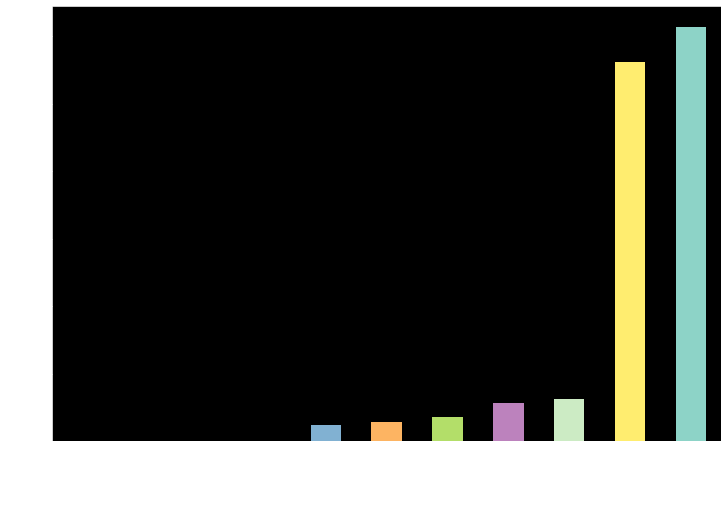

In [78]:
# set up a dataframe to graph
coefficients = model.params.drop(index=['Intercept'])

# Drop zipcodes from dataframe:
for index, value in coefficients.items():
    if index.startswith('zipcode'):
        coefficients.drop(index=[index], inplace=True)

# Take a look at the data:
print(coefficients.head())
coefficients.sort_values().tail(11).plot(kind='bar', figsize=(12,8))

Now I will repeat the same process with the transformed price target:

In [79]:
included = stepwise_selection(data, target2)
selected = data[included]
selected.head()

Add  floors                         with p-value 0.0
Add  view                           with p-value 0.0
Add  bedrooms                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Drop floors                         with p-value 0.836856
Add  lat                            with p-value 0.0
Drop bedrooms                       with p-value 0.147269
Add  yr_built                       with p-value 0.0
Add  zipcode_98004                  with p-value 3.97224e-270
Add  zipcode_98155                  with p-value 3.23344e-141
Add  zipcode_98133                  with p-value 3.03415e-134
Add  zipcode_98040                  with p-value 1.47892e-133
Add  zipcode_98112                  with p-value 5.94741e-120
Add  zipcode_98028                  with p-value 2.12767e-110
Add  condition                      with p-value 8.49506e-99
Add  zipcode_98168                  with p-value 4.62901e-89
Add  zipcode_98019 

,view,sqft_living,grade,lat,yr_built,zipcode_98004,zipcode_98155,zipcode_98040,zipcode_98112,zipcode_98028,...,zipcode_98065,zipcode_98166,zipcode_98038,long,zipcode_98024,zipcode_98056,zipcode_98034,zipcode_98125,zipcode_98177,zipcode_98108
0,0.0,1180,7,47.5112,1955,0,0,0,0,0,...,0,0,0,-122.257,0,0,0,0,0,0
1,0.0,2570,7,47.7210,1951,0,0,0,0,0,...,0,0,0,-122.319,0,0,0,1,0,0
2,0.0,770,6,47.7379,1933,0,0,0,0,1,...,0,0,0,-122.233,0,0,0,0,0,0
3,0.0,1960,7,47.5208,1965,0,0,0,0,0,...,0,0,0,-122.393,0,0,0,0,0,0
4,0.0,1680,8,47.6168,1987,0,0,0,0,0,...,0,0,0,-122.045,0,0,0,0,0,0


In [80]:
outcome = 'price'
pred_sum = '+'.join(selected.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([selected, target2], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1999.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:37:31   Log-Likelihood:                 6146.3
No. Observations:               21556   AIC:                        -1.213e+04
Df Residuals:                   21477   BIC:                        -1.150e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -193.7586      9.225    -21.004      0.000    -211.840    -175.677
view              0.0608      0.002     30.786      0.000       0.057       0.065
sqft_living    9.821e-05   5.62e-06     17.490      0.000    8.72e-05       0.000
grade             0.0906      0.002     43.906      0.000       0.087       0.095
lat               0.9175      0.020     45.578      0.000       0.878       0.957
yr_built         -0.0005   7.25e-05     -6.523      0.000      -0.001      -0.000
zipcode_98004     0.7794      0.011     68.283      0.000       0.757       0.802
zipcode_98155    -0.0412      0.011     -3.817      0.000      -0.062      -0.020
zipcode_98040     0.5800      0.012     48.874      0.000       0.557       0.603
zipcode_98112     0.6697      0.013     53.246      0.000       0.645       0.694
zipcode_98028    -0.0290      0.013     -2.304      0.021      -0.054      -0.004
condition         0.0605      0.002     27.817      0.000       0.056       0.065
zipcode_98168    -0.1523      0.012    -12.707      0.000      -0.176      -0.129
zipcode_98019    -0.0386      0.016     -2.345      0.019      -0.071      -0.006
zipcode_98039     0.8979      0.027     33.022      0.000       0.845       0.951
waterfront        0.4698      0.017     27.648      0.000       0.436       0.503
zipcode_98072     0.0629      0.013      4.789      0.000       0.037       0.089
zipcode_98077     0.0309      0.015      2.008      0.045       0.001       0.061
sqft_living15  8.055e-05   3.28e-06     24.549      0.000    7.41e-05     8.7e-05
zipcode_98178    -0.0768      0.012     -6.443      0.000      -0.100      -0.053
zipcode_98022     0.1351      0.014      9.391      0.000       0.107       0.163
sqft_lot       8.413e-07   4.37e-08     19.269      0.000    7.56e-07    9.27e-07
bathrooms         0.0399      0.003     13.486      0.000       0.034       0.046
date              0.0002   1.18e-05     15.552      0.000       0.000       0.000
zipcode_98116     0.4224      0.012     35.946      0.000       0.399       0.445
zipcode_98119     0.5817      0.015     38.982      0.000       0.552       0.611
zipcode_98136     0.3759      0.013     29.634      0.000       0.351       0.401
zipcode_98053     0.2490      0.012     20.753      0.000       0.225       0.273
zipcode_98052     0.2815      0.010     28.629      0.000       0.262       0.301
zipcode_98106     0.0433      0.011      3.850      0.000       0.021       0.065
zipcode_98055    -0.0332      0.012     -2.847      0.004      -0.056      -0.010
zipcode_98109     0.6028      0.019     32.531      0.000       0.566       0.639
zipcode_98010     0.2277      0.019     11.743      0.000       0.190       0.266
zipcode_98074     0.2668      0.011     24.145      0.000       0.245       0.288
zipcode_98188    -0.0831      0.016     -5.143   

### That improve r squared quite a bit.
We can see that this model has supplied the largest r squared score so far, but compared to the earlier models with hand-picked variables, the condition score has increased by 3 orders of magnitude, indicating stronger collinearity, which is logical since we have added many features to this model that were collinear. I believe that this model is overfit, with coefficients that are distorted, due to the reckless feature selection style. I predicted this, but wanted to see it in action. Now, I want to go back to the old model where we selected one variable at a time, and go on to remove any zipcode variables with p-values over 0.05.

First a fresh look at the old model:

Coefficients: 
 [ 3.20875436e-04  5.46510602e-01  4.68592505e-01  5.96144794e-02
  7.98174069e-02 -6.49047547e-02  1.10810349e-02  1.00720085e+00
  6.36824100e-01  5.62143531e-01  5.28072362e-01  4.79214010e-01
  3.02419764e-01  2.26458864e-01  1.24848668e-01  1.03091862e-01
  1.27078892e-01 -2.68450083e-02  3.15203498e-01  4.27617811e-01
  1.63650610e-01  5.16363207e-01  1.87732583e-02  3.09459124e-02
 -8.83662136e-02  6.04039824e-01  3.11115718e-01  1.50430316e-01
  1.18036482e+00  7.99594306e-01  3.87057751e-02  2.65493062e-01
  4.81698615e-01  4.25764906e-01  3.40411993e-02  2.05114557e-01
  9.79709370e-02  2.71130392e-01  2.70496676e-01  3.05989997e-01
  3.00902697e-01  4.58139277e-01  4.93219555e-01  3.30739249e-01
  6.88054443e-02  8.10964231e-01  5.87623336e-01  7.56820281e-01
  1.31776682e-01  6.15016543e-01  1.61143206e-01  8.28442408e-01
  8.90162691e-01  5.82487740e-01  5.84119107e-01  5.66022272e-01
  2.67716628e-01  8.08966265e-01  6.52889104e-01  2.97770976e-01
  3.51238

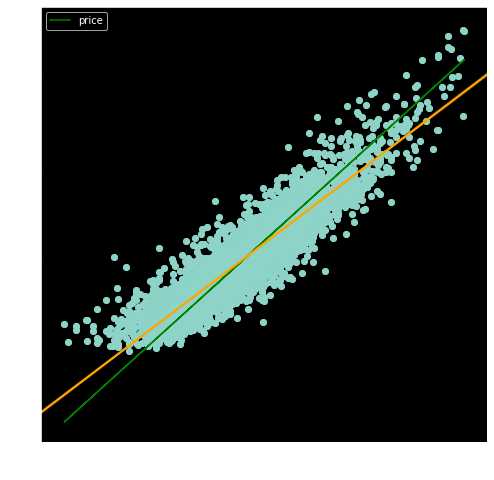

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1581.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:43:27   Log-Likelihood:                 3474.5
No. Observations:               21556   AIC:                            -6799.
Df Residuals:                   21481   BIC:                            -6201.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -15.9034      3.845     -4.136      0.000     -23.440      -8.367
sqft_living       0.0003   1.82e-06    177.251      0.000       0.000       0.000
lat               0.5871      0.081      7.224      0.000       0.428       0.746
waterfront        0.4493      0.019     23.401      0.000       0.412       0.487
was_renovated     0.0555      0.008      7.091      0.000       0.040       0.071
view              0.0788      0.002     36.477      0.000       0.075       0.083
zipcode_98002    -0.0602      0.018     -3.306      0.001      -0.096      -0.025
zipcode_98003     0.0255      0.016      1.550      0.121      -0.007       0.058
zipcode_98004     0.9952      0.030     33.559      0.000       0.937       1.053
zipcode_98005     0.6456      0.031     20.653      0.000       0.584       0.707
zipcode_98006     0.5588      0.025     22.502      0.000       0.510       0.607
zipcode_98007     0.5310      0.032     16.627      0.000       0.468       0.594
zipcode_98008     0.4873      0.030     16.416      0.000       0.429       0.546
zipcode_98010     0.2634      0.023     11.252      0.000       0.218       0.309
zipcode_98011     0.2085      0.041      5.132      0.000       0.129       0.288
zipcode_98014     0.1102      0.037      3.005      0.003       0.038       0.182
zipcode_98019     0.0891      0.039      2.261      0.024       0.012       0.166
zipcode_98022     0.1351      0.019      7.043      0.000       0.098       0.173
zipcode_98023    -0.0127      0.014     -0.891      0.373      -0.041       0.015
zipcode_98024     0.3192      0.033      9.759      0.000       0.255       0.383
zipcode_98027     0.4309      0.023     18.869      0.000       0.386       0.476
zipcode_98028     0.1671      0.040      4.200      0.000       0.089       0.245
zipcode_98029     0.5178      0.026     20.075      0.000       0.467       0.568
zipcode_98030     0.0275      0.018      1.565      0.118      -0.007       0.062
zipcode_98031     0.0346      0.018      1.898      0.058      -0.001       0.070
zipcode_98032    -0.0784      0.022     -3.557      0.000      -0.122      -0.035
zipcode_98033     0.6015      0.034     17.919      0.000       0.536       0.667
zipcode_98034     0.3051      0.036      8.411      0.000       0.234       0.376
zipcode_98038     0.1561      0.015     10.634      0.000       0.127       0.185
zipcode_98039     1.1724      0.041     28.472      0.000       1.092       1.253
zipcode_98040     0.8042      0.026     30.597      0.000       0.753       0.856
zipcode_98042     0.0510      0.015      3.462      0.001       0.022       0.080
zipcode_98045     0.2564      0.022     11.569      0.000       0.213       0.300
zipcode_98052     0.4755      0.033     14.311      0.000       0.410       0.541
zipcode_98053     0.4242      0.034     12.595   

In [83]:
# First to get all the zipcode feature names on a list:
zipcodes = []
features = ['sqft_living','lat','waterfront','was_renovated','view']
for col in df2.columns:
    if col.startswith('zipcode'):
        zipcodes.append(col)
        
# Adding zipcodes to features:
features.extend(zipcodes)

# Setting up X and y
X = pd.DataFrame(df2[features])
y = pd.DataFrame(target2)

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

Now to deal with the p-values over 0.05 in the zipcodes:

In [84]:
# Get a dataframe of only the features we have picked and zipcode dummy variables with p-values
# below 0.05:
included = stepwise_selection(df2[features], target2)
selected = df2[included]

Add  view                           with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  lat                            with p-value 0.0
Add  zipcode_98004                  with p-value 4.21535e-268
Add  zipcode_98112                  with p-value 1.67058e-179
Add  zipcode_98040                  with p-value 8.37571e-164
Add  zipcode_98155                  with p-value 3.0156e-160
Add  zipcode_98133                  with p-value 7.35871e-144
Add  zipcode_98028                  with p-value 6.05241e-132
Add  zipcode_98019                  with p-value 9.52326e-127
Add  zipcode_98168                  with p-value 2.51699e-111
Add  zipcode_98034                  with p-value 1.67983e-106
Add  zipcode_98011                  with p-value 3.72838e-107
Add  zipcode_98125                  with p-value 4.34851e-108
Add  zipcode_98072                  with p-value 2.3719e-120
Add  zipcode_98178                  with p-value 2.59324e-100
Add  zipcode_98177                  w

Coefficients: 
 [ 7.99989436e-02  3.21165484e-04  1.21276863e+00  7.93610596e-01
  6.67828924e-01  6.22699414e-01 -1.43473653e-01 -1.08459826e-01
 -1.42231931e-01 -1.91084826e-01 -2.41197789e-01 -7.98184259e-02
 -1.71647200e-01 -1.26085296e-01  9.59853468e-01  4.72109787e-01
  1.83731213e-01 -2.84431049e-02  5.79456962e-01  3.86679662e-01
  1.69036838e-01 -4.51721973e-02 -7.48266746e-02  6.02202976e-01
  3.98337533e-01 -1.25844935e-01  5.84945013e-01  5.10711997e-01
  4.43571397e-01  3.53131401e-01  4.45598111e-01  2.77990894e-01
  3.40287973e-01  4.26231297e-01  2.77416660e-01  6.41178838e-02
  1.00939137e-01  2.20808126e-01 -8.28968355e-02 -1.40773731e-01
 -4.09076838e-02  5.90950032e-02  2.98187005e-01  3.65844993e-01
 -3.02550109e-02  2.66179666e-01  3.18926980e-01  3.34622397e-01
  3.47658414e-01 -7.39945098e-02 -3.53075671e-02  3.22728887e-01
  2.66695766e-01  3.05333850e-01  2.40067020e-01  1.85142612e-01
  2.25359732e-01  1.39519653e-01  1.47497321e-01  1.13408504e-01
  1.02312

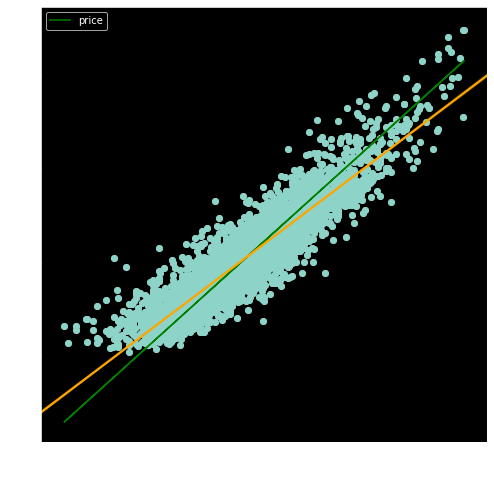

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1767.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:47:07   Log-Likelihood:                 3438.4
No. Observations:               21556   AIC:                            -6743.
Df Residuals:                   21489   BIC:                            -6208.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -45.4500      1.039    -43.742      0.000     -47.487     -43.413
view              0.0790      0.002     36.628      0.000       0.075       0.083
sqft_living       0.0003   1.81e-06    178.707      0.000       0.000       0.000
lat               1.2120      0.022     55.395      0.000       1.169       1.255
zipcode_98004     0.7842      0.013     61.898      0.000       0.759       0.809
zipcode_98112     0.6790      0.014     50.180      0.000       0.653       0.706
zipcode_98040     0.6281      0.013     47.666      0.000       0.602       0.654
zipcode_98155    -0.1489      0.012    -12.431      0.000      -0.172      -0.125
zipcode_98133    -0.0962      0.011     -8.438      0.000      -0.119      -0.074
zipcode_98028    -0.1307      0.014     -9.286      0.000      -0.158      -0.103
zipcode_98019    -0.1974      0.016    -12.065      0.000      -0.229      -0.165
zipcode_98168    -0.2402      0.013    -18.155      0.000      -0.266      -0.214
zipcode_98011    -0.0892      0.016     -5.471      0.000      -0.121      -0.057
zipcode_98178    -0.1782      0.013    -13.292      0.000      -0.205      -0.152
zipcode_98014    -0.1353      0.020     -6.863      0.000      -0.174      -0.097
zipcode_98039     0.9551      0.031     31.172      0.000       0.895       1.015
waterfront        0.4524      0.019     23.537      0.000       0.415       0.490
zipcode_98022     0.1772      0.016     11.383      0.000       0.147       0.208
zipcode_98106    -0.0250      0.012     -2.079      0.038      -0.049      -0.001
zipcode_98119     0.5739      0.016     35.701      0.000       0.542       0.605
zipcode_98006     0.3840      0.010     37.314      0.000       0.364       0.404
zipcode_98053     0.1733      0.012     14.734      0.000       0.150       0.196
zipcode_98146    -0.0367      0.013     -2.854      0.004      -0.062      -0.011
zipcode_98055    -0.0769      0.013     -5.806      0.000      -0.103      -0.051
zipcode_98109     0.5959      0.020     29.183      0.000       0.556       0.636
zipcode_98116     0.4050      0.012     33.135      0.000       0.381       0.429
zipcode_98188    -0.1331      0.018     -7.319      0.000      -0.169      -0.097
zipcode_98102     0.5791      0.021     27.645      0.000       0.538       0.620
zipcode_98105     0.5120      0.015     34.814      0.000       0.483       0.541
zipcode_98122     0.4308      0.013     33.094      0.000       0.405       0.456
zipcode_98136     0.3599      0.013     26.784      0.000       0.334       0.386
zipcode_98199     0.4401      0.013     34.584      0.000       0.415       0.465
zipcode_98010     0.2294      0.021     10.744      0.000       0.188       0.271
zipcode_98029     0.3423      0.012     27.901      0.000       0.318       0.366
zipcode_98005     0.4375      0.017     26.295   

In [85]:
# Setting up X and y
X = pd.DataFrame(selected)
y = pd.DataFrame(target2)

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

We can see that this has dropped the Condition No. significantly.

view             0.079017
sqft_living      0.000323
lat              1.212004
waterfront       0.452441
was_renovated    0.055384
dtype: float64


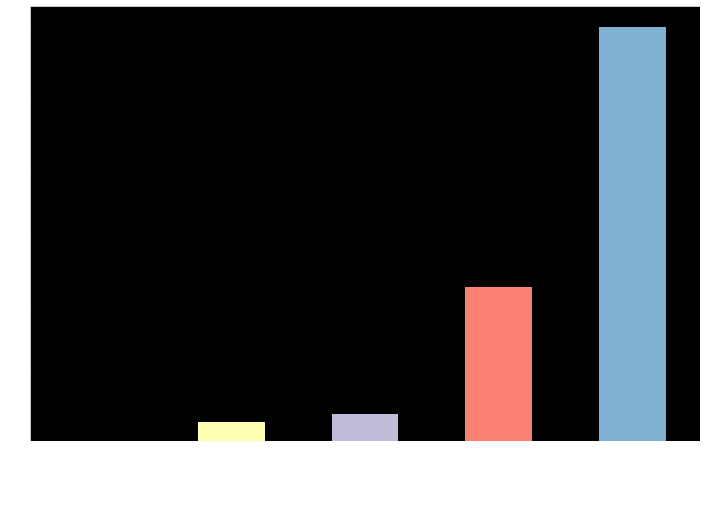

In [86]:
# set up a dataframe to graph, dropping the intercept
coefficients = model.params.drop(index=['Intercept'])

# Drop zipcodes from dataframe:
for index, value in coefficients.items():
    if index.startswith('zipcode'):
        coefficients.drop(index=[index], inplace=True)

# Take a look at the data:
print(coefficients.head())
coefficients.sort_values().tail(11).plot(kind='bar', figsize=(12,8))

I would like to see how adding grade affects this model, since it seemed to be important in the models which used forward-backward selection on all the variables.

Coefficients: 
 [ 7.26767634e-02  2.33978954e-04  1.16807603e+00  7.61223753e-01
  6.28298526e-01  5.87573081e-01 -1.16791925e-01 -9.04506393e-02
 -1.27675007e-01 -1.60308050e-01 -1.90718397e-01 -7.80351330e-02
 -1.22218767e-01 -9.59202492e-02  9.19716087e-01  4.71804437e-01
  1.88831743e-01 -9.89925365e-03  5.36644510e-01  3.47229387e-01
  1.54218231e-01 -7.09884743e-03 -6.16893396e-02  5.67460862e-01
  3.92778881e-01 -9.85438356e-02  5.23238487e-01  4.99408153e-01
  4.09357107e-01  3.44041777e-01  4.23579222e-01  2.89746572e-01
  2.83497412e-01  3.94507268e-01  2.65580071e-01  3.83295044e-02
  1.00312159e-01  2.42941811e-01 -6.41010451e-02 -1.26622514e-01
 -3.76414751e-02  7.40750958e-02  2.50058336e-01  3.46346561e-01
 -2.51021170e-02  2.71268216e-01  2.97724451e-01  3.20580357e-01
  3.37967415e-01 -3.87267666e-02 -5.16472261e-02  3.33246244e-01
  2.70802987e-01  3.11984026e-01  1.88304587e-01  1.97471215e-01
  2.00313414e-01  1.36468274e-01  1.44149388e-01  1.34323905e-01
  1.30321

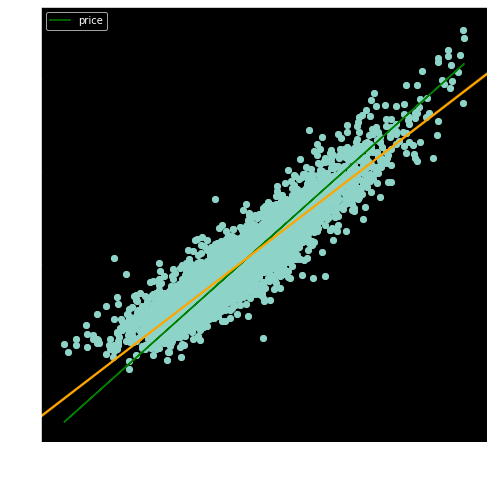

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     2006.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:47:37   Log-Likelihood:                 4747.3
No. Observations:               21556   AIC:                            -9359.
Df Residuals:                   21488   BIC:                            -8816.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -43.7342      0.978    -44.699      0.000     -45.652     -41.816
view              0.0710      0.002     34.877      0.000       0.067       0.075
sqft_living       0.0002   2.38e-06     98.743      0.000       0.000       0.000
lat               1.1640      0.021     56.477      0.000       1.124       1.204
zipcode_98004     0.7527      0.012     63.056      0.000       0.729       0.776
zipcode_98112     0.6373      0.013     49.950      0.000       0.612       0.662
zipcode_98040     0.5888      0.012     47.389      0.000       0.564       0.613
zipcode_98155    -0.1212      0.011    -10.739      0.000      -0.143      -0.099
zipcode_98133    -0.0811      0.011     -7.555      0.000      -0.102      -0.060
zipcode_98028    -0.1164      0.013     -8.790      0.000      -0.142      -0.090
zipcode_98019    -0.1711      0.015    -11.109      0.000      -0.201      -0.141
zipcode_98168    -0.1893      0.012    -15.154      0.000      -0.214      -0.165
zipcode_98011    -0.0806      0.015     -5.247      0.000      -0.111      -0.050
zipcode_98178    -0.1302      0.013    -10.291      0.000      -0.155      -0.105
zipcode_98014    -0.1042      0.019     -5.614      0.000      -0.141      -0.068
zipcode_98039     0.9096      0.029     31.531      0.000       0.853       0.966
waterfront        0.4531      0.018     25.046      0.000       0.418       0.489
zipcode_98022     0.1863      0.015     12.714      0.000       0.158       0.215
zipcode_98106    -0.0053      0.011     -0.467      0.641      -0.028       0.017
zipcode_98119     0.5338      0.015     35.239      0.000       0.504       0.564
zipcode_98006     0.3419      0.010     35.187      0.000       0.323       0.361
zipcode_98053     0.1596      0.011     14.413      0.000       0.138       0.181
zipcode_98146    -0.0002      0.012     -0.019      0.985      -0.024       0.024
zipcode_98055    -0.0600      0.012     -4.808      0.000      -0.084      -0.036
zipcode_98109     0.5601      0.019     29.125      0.000       0.522       0.598
zipcode_98116     0.3934      0.012     34.195      0.000       0.371       0.416
zipcode_98188    -0.1056      0.017     -6.167      0.000      -0.139      -0.072
zipcode_98102     0.5180      0.020     26.230      0.000       0.479       0.557
zipcode_98105     0.5017      0.014     36.242      0.000       0.475       0.529
zipcode_98122     0.3942      0.012     32.126      0.000       0.370       0.418
zipcode_98136     0.3519      0.013     27.831      0.000       0.327       0.377
zipcode_98199     0.4152      0.012     34.646      0.000       0.392       0.439
zipcode_98010     0.2434      0.020     12.113      0.000       0.204       0.283
zipcode_98029     0.2838      0.012     24.467      0.000       0.261       0.307
zipcode_98005     0.4048      0.016     25.835   

In [87]:
# Add grade to the included features:
included.extend(['grade'])
selected = df2[included]

# Setting up X and y
X = pd.DataFrame(selected)
y = pd.DataFrame(target2)

# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

lat              1.164045
view             0.071006
sqft_living      0.000235
waterfront       0.453108
was_renovated    0.072609
dtype: float64


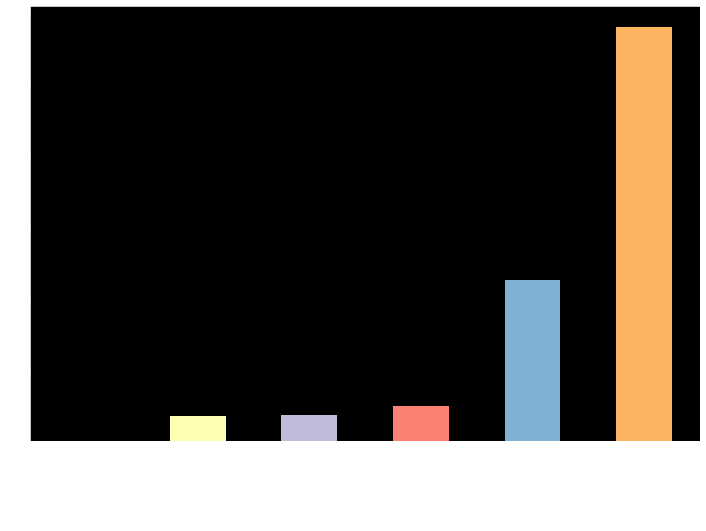

In [94]:
# set up a dataframe to graph, dropping the intercept
coefficients = model.params.drop(index=['Intercept'])

# Drop zipcodes from dataframe:
for index, value in coefficients.items():
    if index.startswith('zipcode'):
        coefficients.drop(index=[index], inplace=True)

# Take a look at the data:
print(coefficients.head())
coefficients.sort_values().tail(11).plot(kind='bar', figsize=(12,8))

This had a positive impact on r squared, but a slight boost to the JB score. It does seem to have a meaningful coefficient with a low standard error, so I am going to keep it in the model.

# Standardization:
I believe the reason that the sqft_living coefficient is so much smaller than the others is because it is a variable on a much larger numeric scale than all the others which are included in the model. I believe there is a similar issue with lat's coefficient being magnified because of relatively small changes having large impacts. Therefore, I will standardize this variable, as well as view, grade, and lat, to see the effect.

In [88]:
# Creating a helper function:
def standardize(x):
    return((x-np.mean(x))/np.sqrt(np.var(x)))

In [89]:
# Setting up X and y
X = pd.DataFrame(selected)
y = pd.DataFrame(target2)

# Set up features for standardization:
for_standardize = ['sqft_living','view','lat','grade']

# Iterate through features to standardize:
for feature in for_standardize:
    X[feature] = standardize(X[feature])

Coefficients: 
 [ 0.05530078  0.21022078  0.16181148  0.76122375  0.62829853  0.58757308
 -0.11679192 -0.09045064 -0.12767501 -0.16030805 -0.1907184  -0.07803513
 -0.12221877 -0.09592025  0.91971609  0.47180444  0.18883174 -0.00989925
  0.53664451  0.34722939  0.15421823 -0.00709885 -0.06168934  0.56746086
  0.39277888 -0.09854384  0.52323849  0.49940815  0.40935711  0.34404178
  0.42357922  0.28974657  0.28349741  0.39450727  0.26558007  0.0383295
  0.10031216  0.24294181 -0.06410105 -0.12662251 -0.03764148  0.0740751
  0.25005834  0.34634656 -0.02510212  0.27126822  0.29772445  0.32058036
  0.33796741 -0.03872677 -0.05164723  0.33324624  0.27080299  0.31198403
  0.18830459  0.19747121  0.20031341  0.13646827  0.14414939  0.1343239
  0.13032146  0.10847144  0.16626904  0.08018368  0.06238864  0.03689317
  0.11339144]
Mean squared error: 0.04
Variance score: 0.86


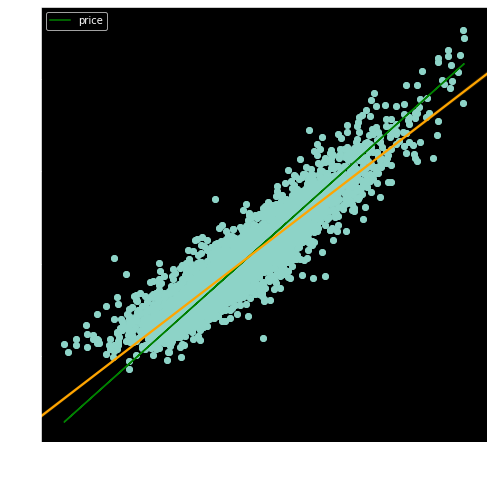

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     2006.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:50:34   Log-Likelihood:                 4747.3
No. Observations:               21556   AIC:                            -9359.
Df Residuals:                   21488   BIC:                            -8816.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.8845      0.004   3278.064      0.000      12.877      12.892
view              0.0540      0.002     34.877      0.000       0.051       0.057
sqft_living       0.2114      0.002     98.743      0.000       0.207       0.216
lat               0.1613      0.003     56.477      0.000       0.156       0.167
zipcode_98004     0.7527      0.012     63.056      0.000       0.729       0.776
zipcode_98112     0.6373      0.013     49.950      0.000       0.612       0.662
zipcode_98040     0.5888      0.012     47.389      0.000       0.564       0.613
zipcode_98155    -0.1212      0.011    -10.739      0.000      -0.143      -0.099
zipcode_98133    -0.0811      0.011     -7.555      0.000      -0.102      -0.060
zipcode_98028    -0.1164      0.013     -8.790      0.000      -0.142      -0.090
zipcode_98019    -0.1711      0.015    -11.109      0.000      -0.201      -0.141
zipcode_98168    -0.1893      0.012    -15.154      0.000      -0.214      -0.165
zipcode_98011    -0.0806      0.015     -5.247      0.000      -0.111      -0.050
zipcode_98178    -0.1302      0.013    -10.291      0.000      -0.155      -0.105
zipcode_98014    -0.1042      0.019     -5.614      0.000      -0.141      -0.068
zipcode_98039     0.9096      0.029     31.531      0.000       0.853       0.966
waterfront        0.4531      0.018     25.046      0.000       0.418       0.489
zipcode_98022     0.1863      0.015     12.714      0.000       0.158       0.215
zipcode_98106    -0.0053      0.011     -0.467      0.641      -0.028       0.017
zipcode_98119     0.5338      0.015     35.239      0.000       0.504       0.564
zipcode_98006     0.3419      0.010     35.187      0.000       0.323       0.361
zipcode_98053     0.1596      0.011     14.413      0.000       0.138       0.181
zipcode_98146    -0.0002      0.012     -0.019      0.985      -0.024       0.024
zipcode_98055    -0.0600      0.012     -4.808      0.000      -0.084      -0.036
zipcode_98109     0.5601      0.019     29.125      0.000       0.522       0.598
zipcode_98116     0.3934      0.012     34.195      0.000       0.371       0.416
zipcode_98188    -0.1056      0.017     -6.167      0.000      -0.139      -0.072
zipcode_98102     0.5180      0.020     26.230      0.000       0.479       0.557
zipcode_98105     0.5017      0.014     36.242      0.000       0.475       0.529
zipcode_98122     0.3942      0.012     32.126      0.000       0.370       0.418
zipcode_98136     0.3519      0.013     27.831      0.000       0.327       0.377
zipcode_98199     0.4152      0.012     34.646      0.000       0.392       0.439
zipcode_98010     0.2434      0.020     12.113      0.000       0.204       0.283
zipcode_98029     0.2838      0.012     24.467      0.000       0.261       0.307
zipcode_98005     0.4048      0.016     25.835   

In [90]:
# Splitting data into training and testing sets and fitting model:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Making predictions on the test data
predicted = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_.flatten())
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

fig = plt.figure(figsize=(8,8)) 
plt.scatter(y_test, predicted)
plt.plot(y_test, y_test, color='g', label='price')
sns.regplot(x=y_test, y=predicted.flatten(), line_kws={'color':'orange'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Perform a regression with statsmodels to see more details
outcome = 'price'
pred_sum = '+'.join(X.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([X, y], axis=1)).fit()
model.summary()

Notice that the Condition No. has dropped nearly to zero with this change.

view             0.054030
sqft_living      0.211381
lat              0.161253
waterfront       0.453108
was_renovated    0.072609
grade            0.114602
dtype: float64


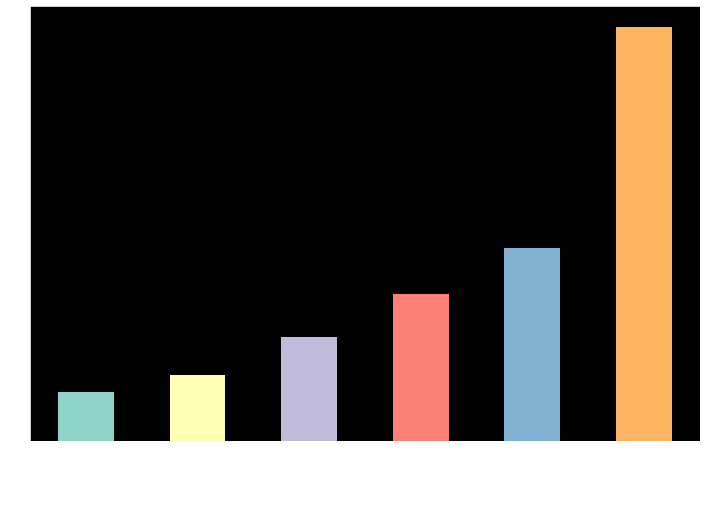

In [92]:
# set up a dataframe to graph, dropping the intercept
coefficients = model.params.drop(index=['Intercept'])

# Drop zipcodes from dataframe:
for index, value in coefficients.items():
    if index.startswith('zipcode'):
        coefficients.drop(index=[index], inplace=True)

# Take a look at the data:
print(coefficients.head(10))
coefficients.sort_values().tail(11).plot(kind='bar', figsize=(12,8))

C:\Users\indez\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


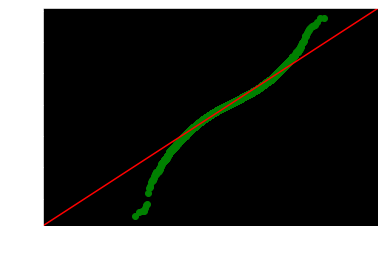

In [93]:
# Just a quick look at our residuals on a Q-Q plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45',fit=True, color='g')
fig.show()

This is the best model so far, I think that this is a good result. I will now draw my conclusions.

# Conclusions:
 - the features have been standardized, so the coeficients can be analyzed knowing that they should be on relatively the same scale (apart from the categorical variables).
 - the most directly influential feature was 'waterfront', a binary variable telling whether the house is on waterfront property. This makes sense, as waterfront property is almost always more valuable than comparable properties which are landlocked. This could be seen early on when the prices were mapped by lat and long.
 - the grade of the house was a strong predictor of price.
 - whether a house was renovated turned out to be a strong predictive feature.
 - the square footage of a house turned out the be the most powerful predictor besides location. This could be adjusted with renovation through additions, which would also serve to raise the grade of a house since sqft_living and grade were shown to be correlated in the heatmaps.
 

## Business Ideas from what the data have shown:
 - the main drivers of selling price appear to be location, size, and quality, in that order.
 - location is the most important feature in predicting home value, but this is not something that a homeowner can change to try and sell their house for more.
 - the square footage and grade both strongly influence price, and they are also somewhat related to one another. Square footage can be added to a home through renovations, which also can add value to a home in and of themselves.
 - I believe there is a strong argument to be made from the findings in this study that renovations which improve the quality and size of a home would be the best way for homeowners to increase the value of their home. Homeowners could be incentivized to purchase renovations for their home knowing that they would get a return on their investment when they go to sell the home, and live in a nicer house in the mean time.